### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("concrete_data.csv")

### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                1030 non-null float64
Blast Furnace Slag    1030 non-null float64
Fly Ash               1030 non-null float64
Water                 1030 non-null float64
Superplasticizer      1030 non-null float64
Coarse Aggregate      1030 non-null float64
Fine Aggregate        1030 non-null float64
Age                   1030 non-null int64
Strength              1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [8]:
df.shape

(1030, 9)

In [9]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=1030, step=1)

In [11]:
df.isnull().any()  #Any NULL values?

Cement                False
Blast Furnace Slag    False
Fly Ash               False
Water                 False
Superplasticizer      False
Coarse Aggregate      False
Fine Aggregate        False
Age                   False
Strength              False
dtype: bool

In [12]:
df.corr() #Find correlation

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


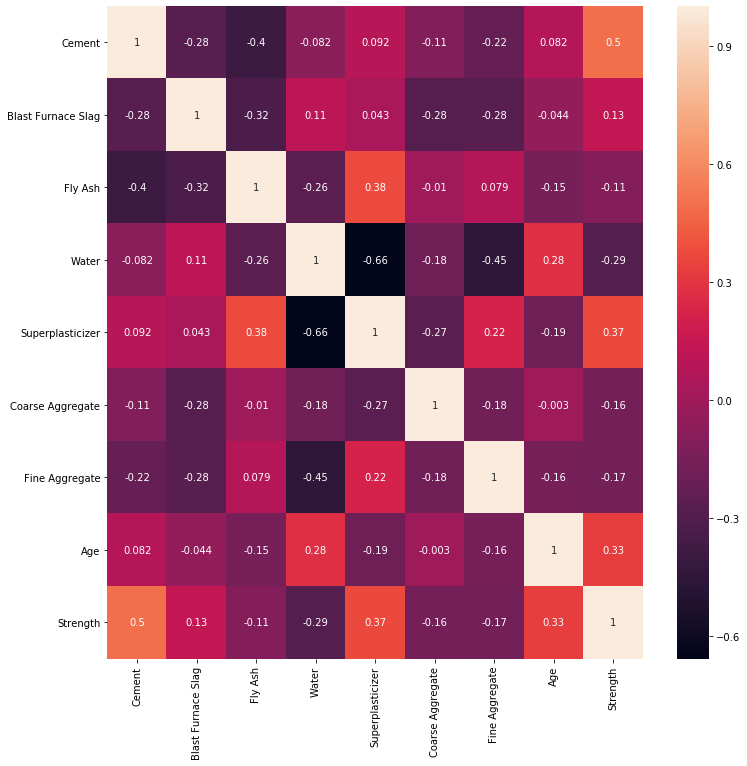

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

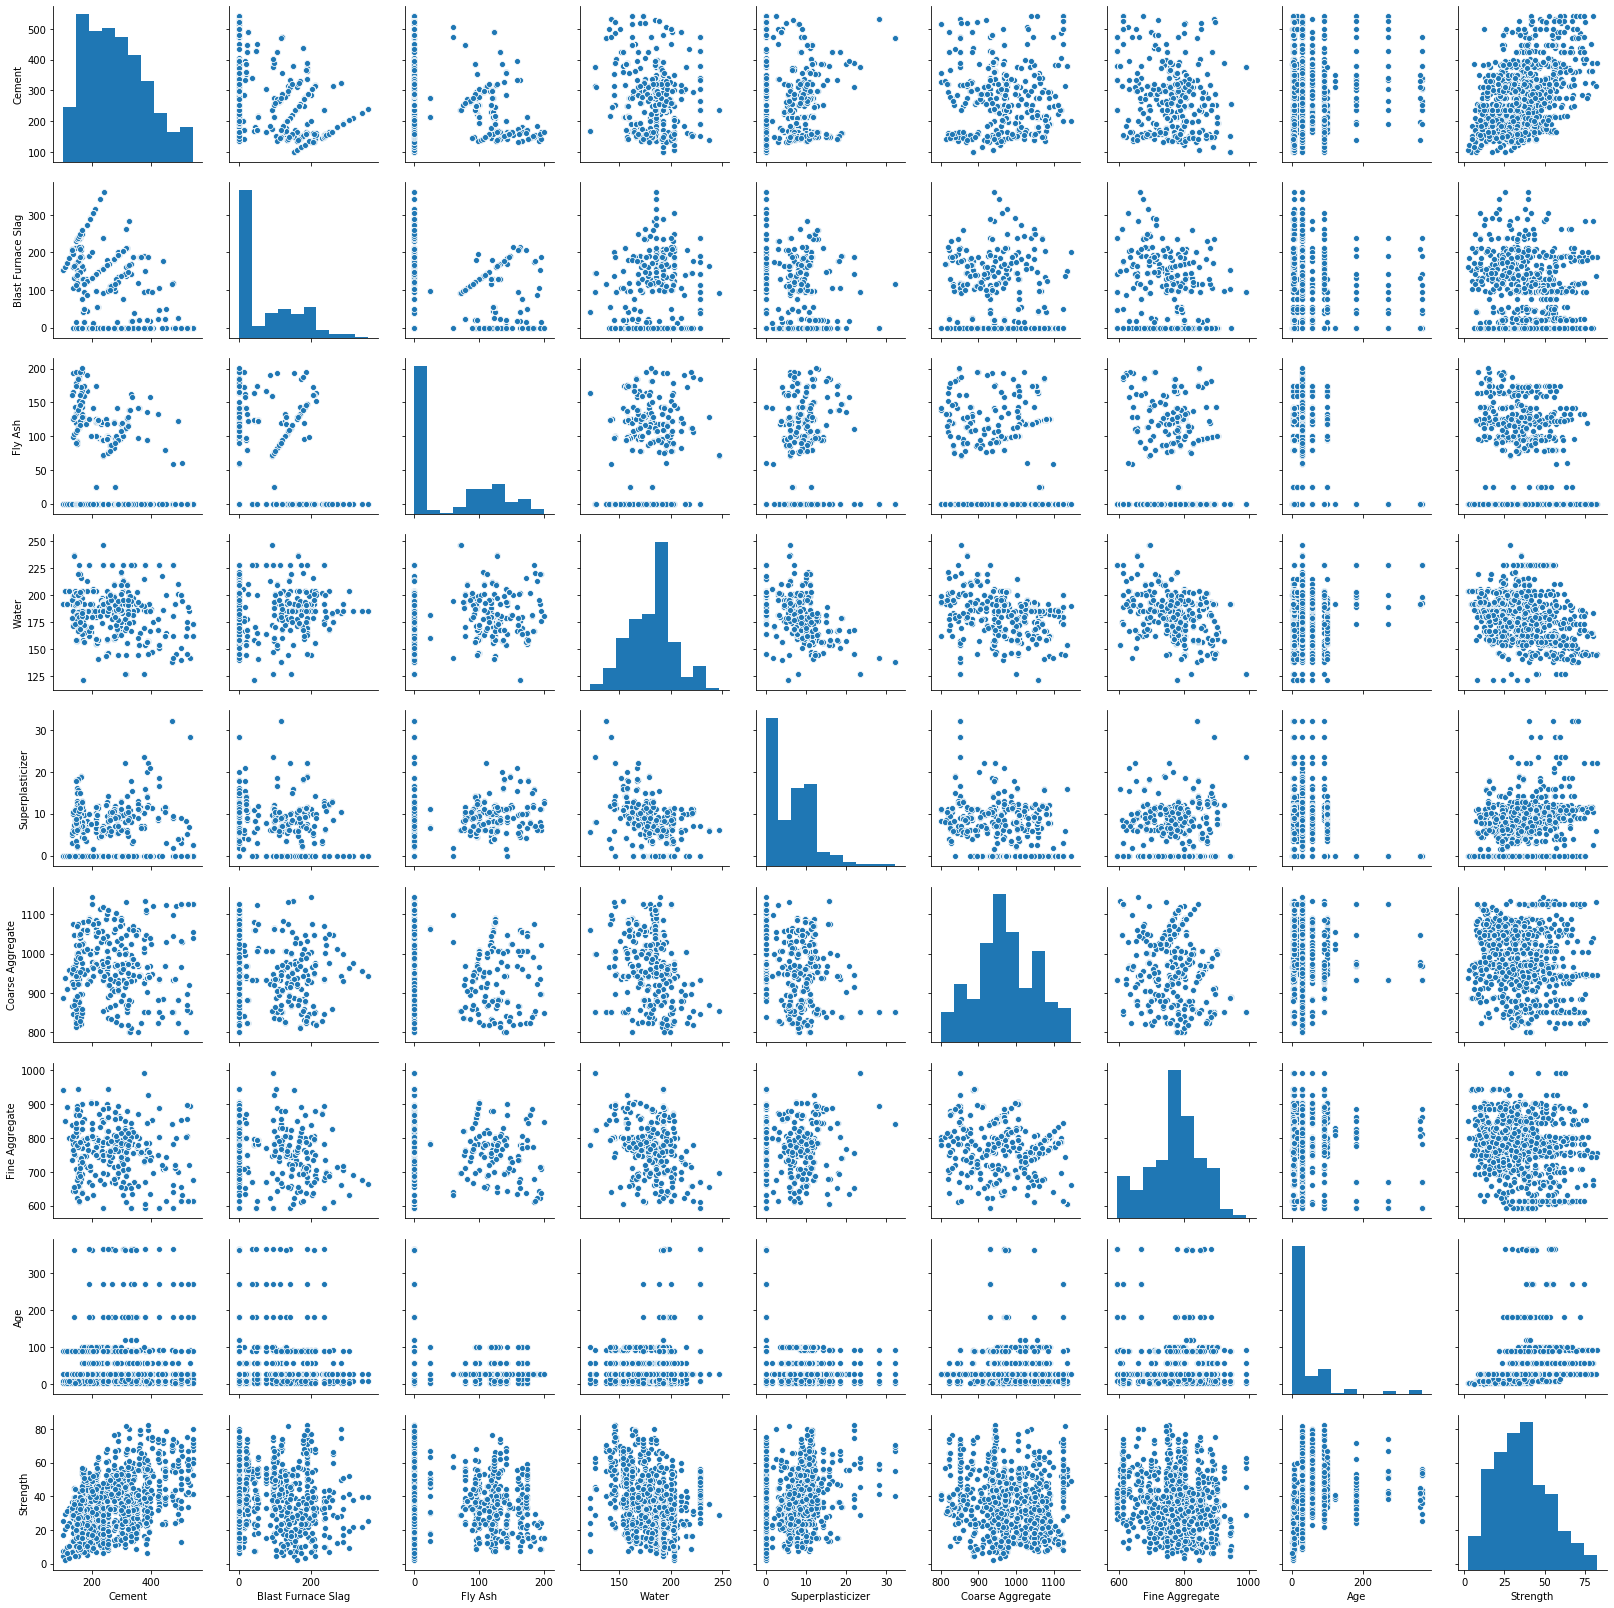

In [14]:
sns.pairplot(df)
plt.show()

### Spilt the independant variables and target variable (Not Normalized)
X = 'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Age'<br>
y = 'Strength'

In [15]:
X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']]

In [16]:
y = df[['Strength']]

In [17]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [18]:
y.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [19]:
#2nd way of normalizing
#X_norm = (X - X.mean()) / X.std()
#X_norm.head()

In [20]:
#X_norm.shape

In [21]:
#y_norm = (y - y.mean()) / y.std()
#y_norm.head()

In [22]:
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Strength']] # all columns except Strength
target = df['Strength'] # Strength column

In [23]:
df_columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [24]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [25]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [26]:
n_cols = predictors.shape[1]  #set the independant columns

In [27]:
n_cols

8

### Train test split

In [28]:
X.shape

(1030, 8)

In [29]:
y.shape

(1030, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
X_train.shape

(721, 8)

In [32]:
X_test.shape

(309, 8)

In [33]:
y_train.shape

(721, 1)

### A. Build a baseline model



In [34]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=n_cols, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [35]:
#This is to test the baseline model first
model = baseline_model()
model.fit(predictors,target,epochs=50)







Epoch 1/50
1030/1030 [==============================] - 0s 212us/step - loss: 126474.7374
Epoch 2/50
1030/1030 [==============================] - 0s 46us/step - loss: 40557.7443
Epoch 3/50
1030/1030 [==============================] - 0s 30us/step - loss: 8827.0842
Epoch 4/50
1030/1030 [==============================] - 0s 30us/step - loss: 1393.5045
Epoch 5/50
1030/1030 [==============================] - 0s 30us/step - loss: 481.9984
Epoch 6/50
1030/1030 [==============================] - 0s 46us/step - loss: 425.2078
Epoch 7/50
1030/1030 [==============================] - 0s 30us/step - loss: 413.8515
Epoch 8/50
1030/1030 [==============================] - 0s 46us/step - loss: 402.8430
Epoch 9/50
1030/1030 [==============================] - 0s 30us/step - loss: 391.5309
Epoch 10/50
1030/1030 [==============================] - 0s 45us/step - loss: 380.4712
Epoch 11/50
1030/1030 [==============================] - 0s 30us/step - loss: 368.7819
Epoch 12/50
1030/1030 [===============

In [36]:
model2 = baseline_model()
model2.fit(X_train,y_train,epochs=50)

Epoch 1/50
721/721 [==============================] - 0s 238us/step - loss: 95793.2753
Epoch 2/50
721/721 [==============================] - 0s 43us/step - loss: 55046.0416
Epoch 3/50
721/721 [==============================] - 0s 43us/step - loss: 30945.5006
Epoch 4/50
721/721 [==============================] - 0s 43us/step - loss: 17232.5495
Epoch 5/50
721/721 [==============================] - 0s 22us/step - loss: 9796.8660
Epoch 6/50
721/721 [==============================] - 0s 22us/step - loss: 6215.7181
Epoch 7/50
721/721 [==============================] - 0s 22us/step - loss: 4615.7474
Epoch 8/50
721/721 [==============================] - 0s 43us/step - loss: 3997.5838
Epoch 9/50
721/721 [==============================] - 0s 43us/step - loss: 3713.0804
Epoch 10/50
721/721 [==============================] - 0s 22us/step - loss: 3519.2623
Epoch 11/50
721/721 [==============================] - 0s 43us/step - loss: 3337.6662
Epoch 12/50
721/721 [==============================] - 0s 

In [37]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [38]:
score = model2.evaluate(X_test,y_test)

309/309 [==============================] - 0s 607us/step


In [39]:
print("Score is ",score,'%')

Score is  607.0687787201026 %


In [40]:
y_pred = model2.predict(X_test)

In [41]:
y_pred

array([[-1.59819078e+01],
       [ 3.55386086e+01],
       [ 4.93367805e+01],
       [ 7.98363419e+01],
       [ 3.71384392e+01],
       [-2.62944012e+01],
       [-2.74905157e+00],
       [ 3.00596027e+01],
       [ 1.06696196e+01],
       [ 4.21253471e+01],
       [ 1.10080206e+00],
       [ 2.97132282e+01],
       [ 4.44081764e+01],
       [ 1.66708241e+01],
       [ 4.38780861e+01],
       [ 2.67371082e+01],
       [ 3.35037270e+01],
       [ 5.26965065e+01],
       [-1.51017504e+01],
       [ 4.26152992e+01],
       [ 5.25166359e+01],
       [ 6.20940285e+01],
       [ 3.75209694e+01],
       [-1.55572329e+01],
       [ 1.39127836e+01],
       [ 1.46239576e+01],
       [ 7.35804138e+01],
       [ 3.00876484e+01],
       [ 2.67371082e+01],
       [ 2.18862476e+01],
       [ 1.10861235e+01],
       [ 4.61450539e+01],
       [ 3.60926628e+01],
       [ 2.40870152e+01],
       [ 8.27620220e+00],
       [ 4.43456688e+01],
       [-2.67498760e+01],
       [ 4.07315559e+01],
       [ 1.8

In [42]:
mean_squared_error(y_test,y_pred)

607.0687630367254

### Repeat 50 times for steps 1 to 3

In [43]:
l = []

for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model2 = baseline_model()
    model2.fit(X_train,y_train,epochs=50)
    y_pred = model2.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    l.append(mse)
    


Epoch 1/50
721/721 [==============================] - 0s 325us/step - loss: 182918.0912
Epoch 2/50
721/721 [==============================] - 0s 43us/step - loss: 76603.4363
Epoch 3/50
721/721 [==============================] - 0s 43us/step - loss: 26548.3023
Epoch 4/50
721/721 [==============================] - 0s 43us/step - loss: 7852.6798
Epoch 5/50
721/721 [==============================] - 0s 43us/step - loss: 3220.1767
Epoch 6/50
721/721 [==============================] - 0s 43us/step - loss: 2612.2493
Epoch 7/50
721/721 [==============================] - 0s 43us/step - loss: 2486.4558
Epoch 8/50
721/721 [==============================] - 0s 43us/step - loss: 2365.3266
Epoch 9/50
721/721 [==============================] - 0s 43us/step - loss: 2239.7228
Epoch 10/50
721/721 [==============================] - 0s 43us/step - loss: 2119.1160
Epoch 11/50
721/721 [==============================] - 0s 43us/step - loss: 2006.3206
Epoch 12/50
721/721 [==============================] - 0s 

721/721 [==============================] - 0s 43us/step - loss: 1465.4750
Epoch 47/50
721/721 [==============================] - 0s 43us/step - loss: 1393.8732
Epoch 48/50
721/721 [==============================] - 0s 65us/step - loss: 1328.4330
Epoch 49/50
721/721 [==============================] - 0s 43us/step - loss: 1267.3284
Epoch 50/50
721/721 [==============================] - 0s 43us/step - loss: 1210.5014
Epoch 1/50
721/721 [==============================] - 0s 467us/step - loss: 326555.3730
Epoch 2/50
721/721 [==============================] - 0s 43us/step - loss: 141639.8326
Epoch 3/50
721/721 [==============================] - 0s 65us/step - loss: 46542.6491
Epoch 4/50
721/721 [==============================] - 0s 65us/step - loss: 12002.5545
Epoch 5/50
721/721 [==============================] - 0s 43us/step - loss: 5304.6584
Epoch 6/50
721/721 [==============================] - 0s 43us/step - loss: 4742.4529
Epoch 7/50
721/721 [==============================] - 0s 65us/ste

721/721 [==============================] - 0s 65us/step - loss: 2045.2740
Epoch 42/50
721/721 [==============================] - 0s 43us/step - loss: 2009.3160
Epoch 43/50
721/721 [==============================] - 0s 65us/step - loss: 1975.4429
Epoch 44/50
721/721 [==============================] - 0s 43us/step - loss: 1944.9174
Epoch 45/50
721/721 [==============================] - 0s 43us/step - loss: 1916.7501
Epoch 46/50
721/721 [==============================] - 0s 43us/step - loss: 1890.3293
Epoch 47/50
721/721 [==============================] - 0s 43us/step - loss: 1867.1690
Epoch 48/50
721/721 [==============================] - ETA: 0s - loss: 1811.70 - 0s 43us/step - loss: 1846.0184
Epoch 49/50
721/721 [==============================] - 0s 43us/step - loss: 1825.7604
Epoch 50/50
721/721 [==============================] - 0s 65us/step - loss: 1808.2870
Epoch 1/50
721/721 [==============================] - 0s 498us/step - loss: 213269.6631
Epoch 2/50
721/721 [==================

721/721 [==============================] - 0s 65us/step - loss: 472.0457
Epoch 37/50
721/721 [==============================] - 0s 22us/step - loss: 459.0904
Epoch 38/50
721/721 [==============================] - 0s 43us/step - loss: 447.5104
Epoch 39/50
721/721 [==============================] - 0s 65us/step - loss: 438.1273
Epoch 40/50
721/721 [==============================] - 0s 43us/step - loss: 428.6791
Epoch 41/50
721/721 [==============================] - 0s 43us/step - loss: 417.3229
Epoch 42/50
721/721 [==============================] - 0s 43us/step - loss: 408.3813
Epoch 43/50
721/721 [==============================] - 0s 65us/step - loss: 401.0359
Epoch 44/50
721/721 [==============================] - 0s 43us/step - loss: 391.5397
Epoch 45/50
721/721 [==============================] - 0s 43us/step - loss: 382.8855
Epoch 46/50
721/721 [==============================] - 0s 43us/step - loss: 378.0439
Epoch 47/50
721/721 [==============================] - 0s 43us/step - loss: 3

721/721 [==============================] - 0s 43us/step - loss: 233.0241
Epoch 33/50
721/721 [==============================] - 0s 65us/step - loss: 228.2165
Epoch 34/50
721/721 [==============================] - 0s 43us/step - loss: 224.1595
Epoch 35/50
721/721 [==============================] - 0s 43us/step - loss: 220.2923
Epoch 36/50
721/721 [==============================] - 0s 65us/step - loss: 216.4893
Epoch 37/50
721/721 [==============================] - 0s 43us/step - loss: 213.2955
Epoch 38/50
721/721 [==============================] - 0s 43us/step - loss: 210.0389
Epoch 39/50
721/721 [==============================] - 0s 43us/step - loss: 206.0842
Epoch 40/50
721/721 [==============================] - 0s 43us/step - loss: 202.8380
Epoch 41/50
721/721 [==============================] - 0s 43us/step - loss: 199.7133
Epoch 42/50
721/721 [==============================] - 0s 43us/step - loss: 196.3372
Epoch 43/50
721/721 [==============================] - 0s 43us/step - loss: 1

721/721 [==============================] - 0s 43us/step - loss: 124.8506
Epoch 29/50
721/721 [==============================] - 0s 43us/step - loss: 120.5551
Epoch 30/50
721/721 [==============================] - 0s 22us/step - loss: 121.9392
Epoch 31/50
721/721 [==============================] - 0s 65us/step - loss: 119.2106
Epoch 32/50
721/721 [==============================] - 0s 22us/step - loss: 118.5752
Epoch 33/50
721/721 [==============================] - 0s 65us/step - loss: 117.7961
Epoch 34/50
721/721 [==============================] - 0s 43us/step - loss: 117.9515
Epoch 35/50
721/721 [==============================] - 0s 52us/step - loss: 119.1818
Epoch 36/50
721/721 [==============================] - 0s 43us/step - loss: 118.8549
Epoch 37/50
721/721 [==============================] - 0s 43us/step - loss: 120.1615
Epoch 38/50
721/721 [==============================] - 0s 43us/step - loss: 117.8532
Epoch 39/50
721/721 [==============================] - 0s 43us/step - loss: 1

721/721 [==============================] - 0s 43us/step - loss: 876.8954
Epoch 25/50
721/721 [==============================] - 0s 43us/step - loss: 857.3047
Epoch 26/50
721/721 [==============================] - 0s 43us/step - loss: 795.7676
Epoch 27/50
721/721 [==============================] - 0s 43us/step - loss: 750.8770
Epoch 28/50
721/721 [==============================] - 0s 43us/step - loss: 715.5606
Epoch 29/50
721/721 [==============================] - 0s 65us/step - loss: 683.2815
Epoch 30/50
721/721 [==============================] - 0s 43us/step - loss: 661.2091
Epoch 31/50
721/721 [==============================] - 0s 43us/step - loss: 633.0549
Epoch 32/50
721/721 [==============================] - 0s 43us/step - loss: 609.6908
Epoch 33/50
721/721 [==============================] - 0s 43us/step - loss: 579.0905
Epoch 34/50
721/721 [==============================] - 0s 65us/step - loss: 560.6320
Epoch 35/50
721/721 [==============================] - 0s 22us/step - loss: 5

721/721 [==============================] - 0s 65us/step - loss: 877.3028
Epoch 20/50
721/721 [==============================] - 0s 43us/step - loss: 832.6131
Epoch 21/50
721/721 [==============================] - 0s 43us/step - loss: 790.6380
Epoch 22/50
721/721 [==============================] - 0s 43us/step - loss: 747.5083
Epoch 23/50
721/721 [==============================] - 0s 43us/step - loss: 707.9845
Epoch 24/50
721/721 [==============================] - 0s 65us/step - loss: 672.0737
Epoch 25/50
721/721 [==============================] - 0s 43us/step - loss: 638.4517
Epoch 26/50
721/721 [==============================] - 0s 43us/step - loss: 604.8815
Epoch 27/50
721/721 [==============================] - 0s 43us/step - loss: 572.1971
Epoch 28/50
721/721 [==============================] - 0s 43us/step - loss: 543.1534
Epoch 29/50
721/721 [==============================] - 0s 43us/step - loss: 514.6957
Epoch 30/50
721/721 [==============================] - 0s 65us/step - loss: 4

721/721 [==============================] - 0s 43us/step - loss: 643.0799
Epoch 16/50
721/721 [==============================] - 0s 65us/step - loss: 584.2760
Epoch 17/50
721/721 [==============================] - 0s 43us/step - loss: 534.5398
Epoch 18/50
721/721 [==============================] - 0s 43us/step - loss: 490.0615
Epoch 19/50
721/721 [==============================] - 0s 65us/step - loss: 453.0653
Epoch 20/50
721/721 [==============================] - 0s 43us/step - loss: 417.1549
Epoch 21/50
721/721 [==============================] - 0s 43us/step - loss: 390.9384
Epoch 22/50
721/721 [==============================] - 0s 43us/step - loss: 363.3288
Epoch 23/50
721/721 [==============================] - 0s 43us/step - loss: 335.9529
Epoch 24/50
721/721 [==============================] - 0s 43us/step - loss: 313.6164
Epoch 25/50
721/721 [==============================] - 0s 43us/step - loss: 295.5716
Epoch 26/50
721/721 [==============================] - 0s 22us/step - loss: 2

721/721 [==============================] - 0s 43us/step - loss: 362.0525
Epoch 12/50
721/721 [==============================] - 0s 43us/step - loss: 334.8052
Epoch 13/50
721/721 [==============================] - 0s 43us/step - loss: 310.2776
Epoch 14/50
721/721 [==============================] - 0s 65us/step - loss: 292.2059
Epoch 15/50
721/721 [==============================] - 0s 87us/step - loss: 274.1278
Epoch 16/50
721/721 [==============================] - 0s 65us/step - loss: 259.8480
Epoch 17/50
721/721 [==============================] - 0s 65us/step - loss: 248.0950
Epoch 18/50
721/721 [==============================] - 0s 43us/step - loss: 238.4307
Epoch 19/50
721/721 [==============================] - 0s 65us/step - loss: 229.5405
Epoch 20/50
721/721 [==============================] - 0s 87us/step - loss: 222.5352
Epoch 21/50
721/721 [==============================] - 0s 65us/step - loss: 215.5267
Epoch 22/50
721/721 [==============================] - 0s 44us/step - loss: 2

721/721 [==============================] - 0s 65us/step - loss: 5600.7720
Epoch 8/50
721/721 [==============================] - 0s 43us/step - loss: 5160.3024
Epoch 9/50
721/721 [==============================] - 0s 65us/step - loss: 4792.3138
Epoch 10/50
721/721 [==============================] - 0s 43us/step - loss: 4448.3020
Epoch 11/50
721/721 [==============================] - 0s 65us/step - loss: 4160.1157
Epoch 12/50
721/721 [==============================] - 0s 43us/step - loss: 3892.0820
Epoch 13/50
721/721 [==============================] - 0s 65us/step - loss: 3656.3428
Epoch 14/50
721/721 [==============================] - 0s 43us/step - loss: 3431.6878
Epoch 15/50
721/721 [==============================] - 0s 65us/step - loss: 3232.6231
Epoch 16/50
721/721 [==============================] - 0s 43us/step - loss: 3046.0773
Epoch 17/50
721/721 [==============================] - 0s 65us/step - loss: 2866.7158
Epoch 18/50
721/721 [==============================] - 0s 43us/step 

721/721 [==============================] - 0s 65us/step - loss: 8856.1631
Epoch 3/50
721/721 [==============================] - 0s 43us/step - loss: 2535.9262
Epoch 4/50
721/721 [==============================] - 0s 65us/step - loss: 1969.8419
Epoch 5/50
721/721 [==============================] - 0s 43us/step - loss: 1819.5137
Epoch 6/50
721/721 [==============================] - 0s 43us/step - loss: 1685.0840
Epoch 7/50
721/721 [==============================] - 0s 65us/step - loss: 1554.9740
Epoch 8/50
721/721 [==============================] - ETA: 0s - loss: 1953.30 - 0s 43us/step - loss: 1431.8340
Epoch 9/50
721/721 [==============================] - 0s 43us/step - loss: 1318.8766
Epoch 10/50
721/721 [==============================] - 0s 43us/step - loss: 1211.1209
Epoch 11/50
721/721 [==============================] - 0s 43us/step - loss: 1113.9457
Epoch 12/50
721/721 [==============================] - 0s 43us/step - loss: 1023.4140
Epoch 13/50
721/721 [==========================

721/721 [==============================] - 0s 87us/step - loss: 604.7150
Epoch 48/50
721/721 [==============================] - 0s 65us/step - loss: 597.1205
Epoch 49/50
721/721 [==============================] - 0s 65us/step - loss: 589.6317
Epoch 50/50
721/721 [==============================] - 0s 43us/step - loss: 582.1690
Epoch 1/50
721/721 [==============================] - 1s 1ms/step - loss: 419045.5062
Epoch 2/50
721/721 [==============================] - 0s 65us/step - loss: 257650.9442
Epoch 3/50
721/721 [==============================] - 0s 43us/step - loss: 161288.6187
Epoch 4/50
721/721 [==============================] - 0s 65us/step - loss: 104991.7356
Epoch 5/50
721/721 [==============================] - ETA: 0s - loss: 86993.968 - 0s 43us/step - loss: 71398.0085
Epoch 6/50
721/721 [==============================] - 0s 65us/step - loss: 50880.6324
Epoch 7/50
721/721 [==============================] - 0s 65us/step - loss: 37608.5642
Epoch 8/50
721/721 [===================

721/721 [==============================] - 0s 43us/step - loss: 191.1543
Epoch 43/50
721/721 [==============================] - 0s 65us/step - loss: 185.6530
Epoch 44/50
721/721 [==============================] - 0s 65us/step - loss: 177.6657
Epoch 45/50
721/721 [==============================] - 0s 43us/step - loss: 169.1130
Epoch 46/50
721/721 [==============================] - 0s 65us/step - loss: 163.0127
Epoch 47/50
721/721 [==============================] - 0s 65us/step - loss: 160.2257
Epoch 48/50
721/721 [==============================] - 0s 65us/step - loss: 156.2409
Epoch 49/50
721/721 [==============================] - 0s 43us/step - loss: 150.3733
Epoch 50/50
721/721 [==============================] - 0s 65us/step - loss: 148.0820
Epoch 1/50
721/721 [==============================] - 1s 1ms/step - loss: 1318.3055
Epoch 2/50
721/721 [==============================] - 0s 43us/step - loss: 561.4931
Epoch 3/50
721/721 [==============================] - 0s 43us/step - loss: 433.

Epoch 39/50
721/721 [==============================] - 0s 22us/step - loss: 88.0630
Epoch 40/50
721/721 [==============================] - 0s 22us/step - loss: 85.9342
Epoch 41/50
721/721 [==============================] - 0s 22us/step - loss: 85.0522
Epoch 42/50
721/721 [==============================] - 0s 43us/step - loss: 84.3590
Epoch 43/50
721/721 [==============================] - 0s 43us/step - loss: 84.3683
Epoch 44/50
721/721 [==============================] - 0s 43us/step - loss: 83.6800
Epoch 45/50
721/721 [==============================] - 0s 43us/step - loss: 83.5517
Epoch 46/50
721/721 [==============================] - 0s 43us/step - loss: 82.9068
Epoch 47/50
721/721 [==============================] - 0s 43us/step - loss: 82.6205
Epoch 48/50
721/721 [==============================] - 0s 22us/step - loss: 81.5364
Epoch 49/50
721/721 [==============================] - 0s 43us/step - loss: 81.0622
Epoch 50/50
721/721 [==============================] - 0s 43us/step - loss: 

721/721 [==============================] - 0s 65us/step - loss: 675.3891
Epoch 36/50
721/721 [==============================] - 0s 43us/step - loss: 663.4562
Epoch 37/50
721/721 [==============================] - 0s 65us/step - loss: 653.7919
Epoch 38/50
721/721 [==============================] - 0s 43us/step - loss: 644.8889
Epoch 39/50
721/721 [==============================] - 0s 65us/step - loss: 633.2750
Epoch 40/50
721/721 [==============================] - 0s 43us/step - loss: 625.3659
Epoch 41/50
721/721 [==============================] - 0s 65us/step - loss: 615.5903
Epoch 42/50
721/721 [==============================] - 0s 43us/step - loss: 604.7429
Epoch 43/50
721/721 [==============================] - 0s 65us/step - loss: 595.3835
Epoch 44/50
721/721 [==============================] - 0s 65us/step - loss: 586.1750
Epoch 45/50
721/721 [==============================] - 0s 43us/step - loss: 577.4904
Epoch 46/50
721/721 [==============================] - 0s 44us/step - loss: 5

721/721 [==============================] - 0s 65us/step - loss: 395.9087
Epoch 32/50
721/721 [==============================] - 0s 65us/step - loss: 363.6705
Epoch 33/50
721/721 [==============================] - 0s 65us/step - loss: 334.3835
Epoch 34/50
721/721 [==============================] - 0s 43us/step - loss: 311.0928
Epoch 35/50
721/721 [==============================] - 0s 65us/step - loss: 293.0846
Epoch 36/50
721/721 [==============================] - 0s 43us/step - loss: 279.4939
Epoch 37/50
721/721 [==============================] - 0s 43us/step - loss: 267.8536
Epoch 38/50
721/721 [==============================] - 0s 65us/step - loss: 260.1324
Epoch 39/50
721/721 [==============================] - 0s 43us/step - loss: 252.7597
Epoch 40/50
721/721 [==============================] - 0s 65us/step - loss: 246.0890
Epoch 41/50
721/721 [==============================] - 0s 65us/step - loss: 240.0126
Epoch 42/50
721/721 [==============================] - 0s 43us/step - loss: 2

721/721 [==============================] - 0s 65us/step - loss: 149.2860
Epoch 28/50
721/721 [==============================] - 0s 66us/step - loss: 146.7568
Epoch 29/50
721/721 [==============================] - 0s 65us/step - loss: 139.6232
Epoch 30/50
721/721 [==============================] - 0s 65us/step - loss: 136.5101
Epoch 31/50
721/721 [==============================] - 0s 65us/step - loss: 134.9909
Epoch 32/50
721/721 [==============================] - 0s 65us/step - loss: 132.4794
Epoch 33/50
721/721 [==============================] - 0s 65us/step - loss: 129.9299
Epoch 34/50
721/721 [==============================] - 0s 65us/step - loss: 128.5343
Epoch 35/50
721/721 [==============================] - 0s 65us/step - loss: 128.3092
Epoch 36/50
721/721 [==============================] - 0s 65us/step - loss: 125.9678
Epoch 37/50
721/721 [==============================] - 0s 65us/step - loss: 124.7909
Epoch 38/50
721/721 [==============================] - 0s 43us/step - loss: 1

721/721 [==============================] - 0s 65us/step - loss: 122.3887
Epoch 24/50
721/721 [==============================] - 0s 65us/step - loss: 123.3524
Epoch 25/50
721/721 [==============================] - 0s 65us/step - loss: 121.3633
Epoch 26/50
721/721 [==============================] - 0s 65us/step - loss: 120.1019
Epoch 27/50
721/721 [==============================] - 0s 43us/step - loss: 120.7898
Epoch 28/50
721/721 [==============================] - 0s 65us/step - loss: 119.1704
Epoch 29/50
721/721 [==============================] - 0s 65us/step - loss: 119.3260
Epoch 30/50
721/721 [==============================] - 0s 65us/step - loss: 118.0385
Epoch 31/50
721/721 [==============================] - 0s 87us/step - loss: 117.3566
Epoch 32/50
721/721 [==============================] - 0s 65us/step - loss: 117.2600
Epoch 33/50
721/721 [==============================] - 0s 65us/step - loss: 116.5587
Epoch 34/50
721/721 [==============================] - 0s 65us/step - loss: 1

721/721 [==============================] - 0s 65us/step - loss: 2438.3815
Epoch 20/50
721/721 [==============================] - 0s 65us/step - loss: 2332.9369
Epoch 21/50
721/721 [==============================] - 0s 65us/step - loss: 2224.4046
Epoch 22/50
721/721 [==============================] - 0s 43us/step - loss: 2138.2526
Epoch 23/50
721/721 [==============================] - 0s 65us/step - loss: 2032.6300
Epoch 24/50
721/721 [==============================] - 0s 65us/step - loss: 1930.5557
Epoch 25/50
721/721 [==============================] - 0s 65us/step - loss: 1847.5853
Epoch 26/50
721/721 [==============================] - 0s 65us/step - loss: 1758.9172
Epoch 27/50
721/721 [==============================] - 0s 65us/step - loss: 1673.4776
Epoch 28/50
721/721 [==============================] - 0s 43us/step - loss: 1600.1202
Epoch 29/50
721/721 [==============================] - 0s 65us/step - loss: 1540.7587
Epoch 30/50
721/721 [==============================] - 0s 65us/ste

721/721 [==============================] - 0s 43us/step - loss: 609.6166
Epoch 16/50
721/721 [==============================] - 0s 43us/step - loss: 587.3501
Epoch 17/50
721/721 [==============================] - 0s 43us/step - loss: 565.6159
Epoch 18/50
721/721 [==============================] - 0s 43us/step - loss: 545.2026
Epoch 19/50
721/721 [==============================] - 0s 43us/step - loss: 524.1071
Epoch 20/50
721/721 [==============================] - 0s 43us/step - loss: 504.5412
Epoch 21/50
721/721 [==============================] - 0s 43us/step - loss: 486.6671
Epoch 22/50
721/721 [==============================] - 0s 43us/step - loss: 469.2716
Epoch 23/50
721/721 [==============================] - 0s 43us/step - loss: 452.6162
Epoch 24/50
721/721 [==============================] - 0s 36us/step - loss: 437.0929
Epoch 25/50
721/721 [==============================] - 0s 52us/step - loss: 422.7404
Epoch 26/50
721/721 [==============================] - 0s 43us/step - loss: 4

721/721 [==============================] - 0s 65us/step - loss: 143.9492
Epoch 12/50
721/721 [==============================] - 0s 60us/step - loss: 139.0659
Epoch 13/50
721/721 [==============================] - 0s 65us/step - loss: 136.0569
Epoch 14/50
721/721 [==============================] - 0s 65us/step - loss: 131.4044
Epoch 15/50
721/721 [==============================] - 0s 65us/step - loss: 129.4392
Epoch 16/50
721/721 [==============================] - 0s 65us/step - loss: 127.6586
Epoch 17/50
721/721 [==============================] - 0s 65us/step - loss: 125.3337
Epoch 18/50
721/721 [==============================] - 0s 43us/step - loss: 125.9658
Epoch 19/50
721/721 [==============================] - 0s 65us/step - loss: 123.7373
Epoch 20/50
721/721 [==============================] - 0s 43us/step - loss: 127.3193
Epoch 21/50
721/721 [==============================] - 0s 65us/step - loss: 127.4054
Epoch 22/50
721/721 [==============================] - 0s 65us/step - loss: 1

721/721 [==============================] - 0s 65us/step - loss: 8801.9558
Epoch 8/50
721/721 [==============================] - 0s 65us/step - loss: 8353.4049
Epoch 9/50
721/721 [==============================] - 0s 43us/step - loss: 7909.0280
Epoch 10/50
721/721 [==============================] - 0s 43us/step - loss: 7469.5490
Epoch 11/50
721/721 [==============================] - 0s 65us/step - loss: 7050.5367
Epoch 12/50
721/721 [==============================] - 0s 65us/step - loss: 6647.6577
Epoch 13/50
721/721 [==============================] - 0s 65us/step - loss: 6259.4966
Epoch 14/50
721/721 [==============================] - 0s 65us/step - loss: 5882.9789
Epoch 15/50
721/721 [==============================] - 0s 65us/step - loss: 5530.9635
Epoch 16/50
721/721 [==============================] - 0s 65us/step - loss: 5183.6015
Epoch 17/50
721/721 [==============================] - 0s 65us/step - loss: 4854.0186
Epoch 18/50
721/721 [==============================] - 0s 65us/step 

721/721 [==============================] - 0s 65us/step - loss: 1869.9923
Epoch 4/50
721/721 [==============================] - 0s 65us/step - loss: 1721.1840
Epoch 5/50
721/721 [==============================] - 0s 65us/step - loss: 1609.3473
Epoch 6/50
721/721 [==============================] - 0s 43us/step - loss: 1501.2244
Epoch 7/50
721/721 [==============================] - 0s 43us/step - loss: 1392.7150
Epoch 8/50
721/721 [==============================] - 0s 87us/step - loss: 1265.6245
Epoch 9/50
721/721 [==============================] - 0s 65us/step - loss: 1126.3381
Epoch 10/50
721/721 [==============================] - 0s 65us/step - loss: 993.0731
Epoch 11/50
721/721 [==============================] - 0s 65us/step - loss: 884.8769
Epoch 12/50
721/721 [==============================] - 0s 65us/step - loss: 806.0407
Epoch 13/50
721/721 [==============================] - 0s 65us/step - loss: 738.4462
Epoch 14/50
721/721 [==============================] - 0s 65us/step - loss: 

721/721 [==============================] - 0s 65us/step - loss: 424.8489
Epoch 50/50
721/721 [==============================] - 0s 65us/step - loss: 412.8826
Epoch 1/50
721/721 [==============================] - 1s 2ms/step - loss: 64505.3068
Epoch 2/50
721/721 [==============================] - 0s 65us/step - loss: 26996.9602
Epoch 3/50
721/721 [==============================] - 0s 65us/step - loss: 11237.3225
Epoch 4/50
721/721 [==============================] - 0s 65us/step - loss: 5268.6291
Epoch 5/50
721/721 [==============================] - 0s 65us/step - loss: 3847.9877
Epoch 6/50
721/721 [==============================] - 0s 43us/step - loss: 3554.5580
Epoch 7/50
721/721 [==============================] - 0s 65us/step - loss: 3347.5197
Epoch 8/50
721/721 [==============================] - 0s 65us/step - loss: 3180.6928
Epoch 9/50
721/721 [==============================] - 0s 87us/step - loss: 3026.9217
Epoch 10/50
721/721 [==============================] - 0s 65us/step - loss:

721/721 [==============================] - 0s 65us/step - loss: 115.4309
Epoch 46/50
721/721 [==============================] - 0s 65us/step - loss: 114.0548
Epoch 47/50
721/721 [==============================] - 0s 65us/step - loss: 111.4740
Epoch 48/50
721/721 [==============================] - 0s 65us/step - loss: 110.4425
Epoch 49/50
721/721 [==============================] - 0s 65us/step - loss: 108.9610
Epoch 50/50
721/721 [==============================] - 0s 65us/step - loss: 107.3119
Epoch 1/50
721/721 [==============================] - 1s 2ms/step - loss: 946182.7134
Epoch 2/50
721/721 [==============================] - 0s 65us/step - loss: 657451.2826
Epoch 3/50
721/721 [==============================] - 0s 65us/step - loss: 457517.0375
Epoch 4/50
721/721 [==============================] - 0s 65us/step - loss: 320688.1996
Epoch 5/50
721/721 [==============================] - 0s 87us/step - loss: 225263.2223
Epoch 6/50
721/721 [==============================] - 0s 65us/step -

Epoch 41/50
721/721 [==============================] - 0s 65us/step - loss: 299.3640
Epoch 42/50
721/721 [==============================] - 0s 65us/step - loss: 280.1787
Epoch 43/50
721/721 [==============================] - 0s 65us/step - loss: 262.4372
Epoch 44/50
721/721 [==============================] - 0s 65us/step - loss: 246.9940
Epoch 45/50
721/721 [==============================] - 0s 65us/step - loss: 233.1877
Epoch 46/50
721/721 [==============================] - 0s 65us/step - loss: 220.0995
Epoch 47/50
721/721 [==============================] - 0s 65us/step - loss: 209.6418
Epoch 48/50
721/721 [==============================] - 0s 65us/step - loss: 199.3637
Epoch 49/50
721/721 [==============================] - 0s 65us/step - loss: 190.1790
Epoch 50/50
721/721 [==============================] - 0s 65us/step - loss: 181.9287


In [44]:
print("A list of 50 mean squared errors:", l)

A list of 50 mean squared errors: [510.915533185991, 1198.618117726843, 485.6367339647673, 1855.4465378055727, 103.2374736897105, 317.896103418164, 98.4043203463954, 139.5537849809597, 225.23368054582994, 93.91911265087072, 405.70291841820773, 295.4247439837862, 1086.1871863511026, 177.8376684941068, 303.31094166857025, 111.2252336171504, 107.90525807698526, 114.0171272939242, 179.52555530688218, 351.6169564366705, 695.5715224133343, 142.4115077028561, 618.4042519567078, 981.4378934835478, 126.33095971543938, 88.56260505688896, 69.38397956220565, 109.24139853925098, 548.0992314389456, 351.3429752062845, 181.00015100118787, 191.40313590273902, 94.21910121270484, 619.5009871724508, 100.92926504263991, 130.444033532146, 597.0612208528426, 228.26096255103937, 293.44790390945826, 136.72722748877604, 94.42796690862056, 125.78039443444901, 623.9154763531053, 214.76811063442094, 113.04375055694923, 330.5213935503825, 108.05139413008054, 111.80051353310381, 497.5005884449631, 159.43953365300166

In [45]:
s = sum(l)

In [46]:
s.mean()

16844.64442390301

In [47]:
import statistics

In [48]:
statistics.stdev(l)

345.409030829459

**Mean and the standard deviation of the mean squared errors are 16844.64 and 345.409.**

### B. Normalize the data

### Train test split

In [49]:
X.shape

(1030, 8)

In [50]:
y.shape

(1030, 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
772,382.0,0.0,0.0,186.0,0.0,1047.0,739.0,7
997,310.0,142.8,0.0,167.9,10.0,914.3,804.0,28
724,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90
167,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91
764,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3


In [53]:
X_test.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3


In [54]:
y_train.head()

,Strength
772,24.00
997,45.30
724,35.76
167,74.19
764,14.70


In [55]:
X_train.shape

(721, 8)

In [56]:
X_test.shape

(309, 8)

### Standarisation

StandardScaler from scikit-learn removes the mean and scales the data to unit variance. 

In [57]:
scaler = StandardScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it
X_test_scaled = scaler.transform(X_test) # transform the test set
y_train_scaled = scaler.fit_transform(y_train)

In [59]:
X_train_scaled

array([[ 0.97439458, -0.8704381 , -0.8293616 , ...,  0.97017264,
        -0.45169706, -0.60901288],
       [ 0.28796059,  0.7439307 , -0.8293616 , ..., -0.73327832,
         0.3565463 , -0.28406436],
       [ 0.28796059, -0.8704381 , -0.8293616 , ...,  0.52088264,
         0.67984364,  0.67530744],
       ...,
       [-1.2946511 , -0.8704381 ,  1.85586008, ..., -0.36486052,
         0.85392682, -0.28406436],
       [-0.38321931,  3.19261614, -0.8293616 , ..., -0.38283212,
        -1.38055519, -0.28406436],
       [-0.83702844,  2.38543174, -0.8293616 , ..., -0.53430703,
        -0.73644741,  0.67530744]])

In [60]:
X_test_scaled

array([[ 2.09938362, -0.8704381 , -0.8293616 , ...,  1.97144751,
        -2.01844571, -0.67090783],
       [-1.49867454,  1.20857046, -0.8293616 , ..., -0.16974029,
         0.3080517 , -0.60901288],
       [ 0.78943876,  1.26622648, -0.8293616 , ..., -0.34303786,
        -0.24279723,  0.69078118],
       ...,
       [-1.01817075,  0.44095392, -0.8293616 , ..., -0.31608046,
         1.01308859, -0.60901288],
       [-0.47474384, -0.8704381 ,  0.98584826, ...,  0.74424395,
        -0.2079806 , -0.5006967 ],
       [-0.02570161, -0.8704381 ,  0.66515607, ...,  0.03179837,
         1.24685744, -0.28406436]])

In [61]:
y_train_scaled

array([[-6.98142676e-01],
       [ 5.56356122e-01],
       [-5.51798779e-03],
       [ 2.25788055e+00],
       [-1.24588159e+00],
       [-6.03319058e-01],
       [ 1.53934133e+00],
       [ 1.30533290e-01],
       [ 1.07464671e+00],
       [ 2.94854964e-01],
       [ 2.34780374e-01],
       [-7.90021462e-01],
       [-5.86827994e-01],
       [ 4.16182078e-01],
       [-3.06479906e-01],
       [-5.68570031e-01],
       [-7.48793802e-01],
       [-5.29698237e-01],
       [-5.71514863e-01],
       [ 9.77467221e-01],
       [ 1.21698792e-01],
       [ 3.52573688e-01],
       [ 7.73684787e-01],
       [-1.60868500e+00],
       [-6.10695436e-03],
       [ 7.50126124e-01],
       [-8.39494654e-01],
       [-4.15438722e-01],
       [-1.78674160e-01],
       [ 2.55884247e+00],
       [-1.42551639e+00],
       [ 1.82145632e+00],
       [ 1.48633434e+00],
       [ 7.54837857e-01],
       [ 2.55983170e-01],
       [-5.65036231e-01],
       [-1.31891344e+00],
       [ 7.00063965e-01],
       [-7.1

In [62]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [63]:
#This is to test the baseline model first using normalized values
model3 = baseline_model()
model3.fit(X_train_scaled,y_train_scaled,epochs=50)

Epoch 1/50
721/721 [==============================] - 2s 2ms/step - loss: 1.6717
Epoch 2/50
721/721 [==============================] - 0s 65us/step - loss: 1.3950
Epoch 3/50
721/721 [==============================] - 0s 65us/step - loss: 1.1875
Epoch 4/50
721/721 [==============================] - 0s 87us/step - loss: 1.0421
Epoch 5/50
721/721 [==============================] - 0s 65us/step - loss: 0.9328
Epoch 6/50
721/721 [==============================] - 0s 65us/step - loss: 0.8499
Epoch 7/50
721/721 [==============================] - 0s 65us/step - loss: 0.7834
Epoch 8/50
721/721 [==============================] - 0s 65us/step - loss: 0.7277
Epoch 9/50
721/721 [==============================] - 0s 65us/step - loss: 0.6817
Epoch 10/50
721/721 [==============================] - 0s 65us/step - loss: 0.6442
Epoch 11/50
721/721 [==============================] - 0s 65us/step - loss: 0.6097
Epoch 12/50
721/721 [==============================] - 0s 65us/step - loss: 0.5761
Epoch 13/50
72

In [76]:
model3.summary()

Model: "sequential_153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_305 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_306 (Dense)            (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [64]:
m = []

for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X_train_scaled,y_train_scaled, test_size=0.3, random_state=0)
    model3 = baseline_model()
    model3.fit(X_train,y_train,epochs=50)
    y_pred = model3.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    m.append(mse)

Epoch 1/50
504/504 [==============================] - 1s 3ms/step - loss: 1.3874
Epoch 2/50
504/504 [==============================] - 0s 62us/step - loss: 1.2120
Epoch 3/50
504/504 [==============================] - 0s 93us/step - loss: 1.0748
Epoch 4/50
504/504 [==============================] - 0s 62us/step - loss: 0.9688
Epoch 5/50
504/504 [==============================] - 0s 62us/step - loss: 0.8797
Epoch 6/50
504/504 [==============================] - 0s 62us/step - loss: 0.8107
Epoch 7/50
504/504 [==============================] - 0s 93us/step - loss: 0.7537
Epoch 8/50
504/504 [==============================] - 0s 62us/step - loss: 0.7046
Epoch 9/50
504/504 [==============================] - 0s 93us/step - loss: 0.6626
Epoch 10/50
504/504 [==============================] - 0s 93us/step - loss: 0.6262
Epoch 11/50
504/504 [==============================] - 0s 93us/step - loss: 0.5921
Epoch 12/50
504/504 [==============================] - 0s 62us/step - loss: 0.5646
Epoch 13/50
50

Epoch 50/50
504/504 [==============================] - 0s 62us/step - loss: 0.3021
Epoch 1/50
504/504 [==============================] - 2s 3ms/step - loss: 1.9150
Epoch 2/50
504/504 [==============================] - 0s 93us/step - loss: 1.6685
Epoch 3/50
504/504 [==============================] - 0s 62us/step - loss: 1.4524
Epoch 4/50
504/504 [==============================] - 0s 62us/step - loss: 1.2720
Epoch 5/50
504/504 [==============================] - 0s 93us/step - loss: 1.1246
Epoch 6/50
504/504 [==============================] - 0s 62us/step - loss: 0.9939
Epoch 7/50
504/504 [==============================] - 0s 62us/step - loss: 0.8888
Epoch 8/50
504/504 [==============================] - 0s 62us/step - loss: 0.7946
Epoch 9/50
504/504 [==============================] - 0s 62us/step - loss: 0.7214
Epoch 10/50
504/504 [==============================] - 0s 31us/step - loss: 0.6619
Epoch 11/50
504/504 [==============================] - 0s 31us/step - loss: 0.6103
Epoch 12/50
50

Epoch 49/50
504/504 [==============================] - 0s 62us/step - loss: 0.3119
Epoch 50/50
504/504 [==============================] - 0s 62us/step - loss: 0.3079
Epoch 1/50
504/504 [==============================] - 2s 3ms/step - loss: 2.6038
Epoch 2/50
504/504 [==============================] - 0s 31us/step - loss: 2.2406
Epoch 3/50
504/504 [==============================] - 0s 62us/step - loss: 1.9394
Epoch 4/50
504/504 [==============================] - 0s 62us/step - loss: 1.6932
Epoch 5/50
504/504 [==============================] - 0s 62us/step - loss: 1.4864
Epoch 6/50
504/504 [==============================] - 0s 62us/step - loss: 1.3147
Epoch 7/50
504/504 [==============================] - 0s 62us/step - loss: 1.1758
Epoch 8/50
504/504 [==============================] - 0s 62us/step - loss: 1.0460
Epoch 9/50
504/504 [==============================] - 0s 62us/step - loss: 0.9444
Epoch 10/50
504/504 [==============================] - 0s 62us/step - loss: 0.8532
Epoch 11/50
50

Epoch 48/50
504/504 [==============================] - 0s 93us/step - loss: 0.2713
Epoch 49/50
504/504 [==============================] - 0s 62us/step - loss: 0.2664
Epoch 50/50
504/504 [==============================] - 0s 31us/step - loss: 0.2618
Epoch 1/50
504/504 [==============================] - 2s 3ms/step - loss: 1.8392
Epoch 2/50
504/504 [==============================] - 0s 62us/step - loss: 1.6223
Epoch 3/50
504/504 [==============================] - 0s 62us/step - loss: 1.4418
Epoch 4/50
504/504 [==============================] - 0s 62us/step - loss: 1.2960
Epoch 5/50
504/504 [==============================] - 0s 93us/step - loss: 1.1721
Epoch 6/50
504/504 [==============================] - 0s 62us/step - loss: 1.0688
Epoch 7/50
504/504 [==============================] - 0s 93us/step - loss: 0.9794
Epoch 8/50
504/504 [==============================] - 0s 62us/step - loss: 0.8941
Epoch 9/50
504/504 [==============================] - 0s 93us/step - loss: 0.8250
Epoch 10/50
50

Epoch 47/50
504/504 [==============================] - 0s 62us/step - loss: 0.2690
Epoch 48/50
504/504 [==============================] - 0s 31us/step - loss: 0.2664
Epoch 49/50
504/504 [==============================] - 0s 31us/step - loss: 0.2632
Epoch 50/50
504/504 [==============================] - 0s 31us/step - loss: 0.2599
Epoch 1/50
504/504 [==============================] - 2s 4ms/step - loss: 1.2504
Epoch 2/50
504/504 [==============================] - 0s 62us/step - loss: 1.0883
Epoch 3/50
504/504 [==============================] - 0s 62us/step - loss: 0.9647
Epoch 4/50
504/504 [==============================] - 0s 62us/step - loss: 0.8743
Epoch 5/50
504/504 [==============================] - 0s 93us/step - loss: 0.8036
Epoch 6/50
504/504 [==============================] - 0s 62us/step - loss: 0.7449
Epoch 7/50
504/504 [==============================] - 0s 62us/step - loss: 0.7004
Epoch 8/50
504/504 [==============================] - 0s 62us/step - loss: 0.6614
Epoch 9/50
50

Epoch 46/50
504/504 [==============================] - 0s 93us/step - loss: 0.2232
Epoch 47/50
504/504 [==============================] - 0s 62us/step - loss: 0.2207
Epoch 48/50
504/504 [==============================] - 0s 62us/step - loss: 0.2183
Epoch 49/50
504/504 [==============================] - 0s 62us/step - loss: 0.2166
Epoch 50/50
504/504 [==============================] - 0s 62us/step - loss: 0.2145
Epoch 1/50
504/504 [==============================] - 2s 4ms/step - loss: 2.2609
Epoch 2/50
504/504 [==============================] - 0s 62us/step - loss: 1.9110
Epoch 3/50
504/504 [==============================] - 0s 62us/step - loss: 1.6216
Epoch 4/50
504/504 [==============================] - 0s 62us/step - loss: 1.4010
Epoch 5/50
504/504 [==============================] - 0s 93us/step - loss: 1.2194
Epoch 6/50
504/504 [==============================] - 0s 62us/step - loss: 1.0733
Epoch 7/50
504/504 [==============================] - 0s 62us/step - loss: 0.9533
Epoch 8/50
5

Epoch 45/50
504/504 [==============================] - 0s 62us/step - loss: 0.3423
Epoch 46/50
504/504 [==============================] - 0s 62us/step - loss: 0.3373
Epoch 47/50
504/504 [==============================] - 0s 62us/step - loss: 0.3320
Epoch 48/50
504/504 [==============================] - 0s 62us/step - loss: 0.3275
Epoch 49/50
504/504 [==============================] - 0s 62us/step - loss: 0.3227
Epoch 50/50
504/504 [==============================] - 0s 62us/step - loss: 0.3185
Epoch 1/50
504/504 [==============================] - 2s 4ms/step - loss: 1.8400
Epoch 2/50
504/504 [==============================] - 0s 62us/step - loss: 1.5290
Epoch 3/50
504/504 [==============================] - 0s 62us/step - loss: 1.2978
Epoch 4/50
504/504 [==============================] - 0s 62us/step - loss: 1.1178
Epoch 5/50
504/504 [==============================] - 0s 62us/step - loss: 0.9774
Epoch 6/50
504/504 [==============================] - 0s 62us/step - loss: 0.8746
Epoch 7/50


Epoch 44/50
504/504 [==============================] - 0s 62us/step - loss: 0.2688
Epoch 45/50
504/504 [==============================] - 0s 62us/step - loss: 0.2647
Epoch 46/50
504/504 [==============================] - 0s 62us/step - loss: 0.2598
Epoch 47/50
504/504 [==============================] - 0s 31us/step - loss: 0.2557
Epoch 48/50
504/504 [==============================] - 0s 62us/step - loss: 0.2521
Epoch 49/50
504/504 [==============================] - 0s 62us/step - loss: 0.2495
Epoch 50/50
504/504 [==============================] - 0s 62us/step - loss: 0.2453
Epoch 1/50
504/504 [==============================] - 2s 4ms/step - loss: 1.5384
Epoch 2/50
504/504 [==============================] - 0s 93us/step - loss: 1.2859
Epoch 3/50
504/504 [==============================] - 0s 62us/step - loss: 1.0914
Epoch 4/50
504/504 [==============================] - 0s 62us/step - loss: 0.9405
Epoch 5/50
504/504 [==============================] - 0s 62us/step - loss: 0.8284
Epoch 6/50

Epoch 43/50
504/504 [==============================] - 0s 62us/step - loss: 0.3376
Epoch 44/50
504/504 [==============================] - 0s 62us/step - loss: 0.3327
Epoch 45/50
504/504 [==============================] - 0s 93us/step - loss: 0.3287
Epoch 46/50
504/504 [==============================] - 0s 62us/step - loss: 0.3251
Epoch 47/50
504/504 [==============================] - 0s 62us/step - loss: 0.3208
Epoch 48/50
504/504 [==============================] - 0s 62us/step - loss: 0.3173
Epoch 49/50
504/504 [==============================] - 0s 93us/step - loss: 0.3136
Epoch 50/50
504/504 [==============================] - 0s 62us/step - loss: 0.3108
Epoch 1/50
504/504 [==============================] - 2s 4ms/step - loss: 2.0705
Epoch 2/50
504/504 [==============================] - 0s 62us/step - loss: 1.8087
Epoch 3/50
504/504 [==============================] - 0s 62us/step - loss: 1.5817
Epoch 4/50
504/504 [==============================] - 0s 93us/step - loss: 1.3865
Epoch 5/5

504/504 [==============================] - 0s 62us/step - loss: 0.2606
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.2565
Epoch 43/50
504/504 [==============================] - 0s 62us/step - loss: 0.2531
Epoch 44/50
504/504 [==============================] - 0s 62us/step - loss: 0.2503
Epoch 45/50
504/504 [==============================] - 0s 62us/step - loss: 0.2456
Epoch 46/50
504/504 [==============================] - 0s 62us/step - loss: 0.2424
Epoch 47/50
504/504 [==============================] - 0s 62us/step - loss: 0.2395
Epoch 48/50
504/504 [==============================] - 0s 62us/step - loss: 0.2369
Epoch 49/50
504/504 [==============================] - 0s 62us/step - loss: 0.2343
Epoch 50/50
504/504 [==============================] - 0s 62us/step - loss: 0.2322
Epoch 1/50
504/504 [==============================] - 2s 4ms/step - loss: 1.0822
Epoch 2/50
504/504 [==============================] - 0s 73us/step - loss: 0.9959
Epoch 3/50
504/504 

504/504 [==============================] - 0s 93us/step - loss: 0.2706
Epoch 41/50
504/504 [==============================] - 0s 62us/step - loss: 0.2674
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.2636
Epoch 43/50
504/504 [==============================] - 0s 62us/step - loss: 0.2597
Epoch 44/50
504/504 [==============================] - 0s 62us/step - loss: 0.2563
Epoch 45/50
504/504 [==============================] - 0s 62us/step - loss: 0.2533
Epoch 46/50
504/504 [==============================] - 0s 62us/step - loss: 0.2502
Epoch 47/50
504/504 [==============================] - 0s 62us/step - loss: 0.2475
Epoch 48/50
504/504 [==============================] - 0s 62us/step - loss: 0.2447
Epoch 49/50
504/504 [==============================] - 0s 62us/step - loss: 0.2420
Epoch 50/50
504/504 [==============================] - 0s 93us/step - loss: 0.2395
Epoch 1/50
504/504 [==============================] - 2s 4ms/step - loss: 2.4736
Epoch 2/50
504/504

504/504 [==============================] - 0s 62us/step - loss: 0.3465
Epoch 39/50
504/504 [==============================] - 0s 62us/step - loss: 0.3424
Epoch 40/50
504/504 [==============================] - 0s 62us/step - loss: 0.3384
Epoch 41/50
504/504 [==============================] - 0s 93us/step - loss: 0.3345
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.3293
Epoch 43/50
504/504 [==============================] - 0s 62us/step - loss: 0.3244
Epoch 44/50
504/504 [==============================] - 0s 62us/step - loss: 0.3201
Epoch 45/50
504/504 [==============================] - 0s 93us/step - loss: 0.3141
Epoch 46/50
504/504 [==============================] - 0s 62us/step - loss: 0.3090
Epoch 47/50
504/504 [==============================] - 0s 62us/step - loss: 0.3039
Epoch 48/50
504/504 [==============================] - 0s 63us/step - loss: 0.2992
Epoch 49/50
504/504 [==============================] - 0s 62us/step - loss: 0.2941
Epoch 50/50
504/

504/504 [==============================] - 0s 62us/step - loss: 0.4506
Epoch 37/50
504/504 [==============================] - 0s 62us/step - loss: 0.4457
Epoch 38/50
504/504 [==============================] - 0s 62us/step - loss: 0.4406
Epoch 39/50
504/504 [==============================] - 0s 62us/step - loss: 0.4366
Epoch 40/50
504/504 [==============================] - 0s 62us/step - loss: 0.4319
Epoch 41/50
504/504 [==============================] - 0s 62us/step - loss: 0.4275
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.4229
Epoch 43/50
504/504 [==============================] - 0s 93us/step - loss: 0.4184
Epoch 44/50
504/504 [==============================] - 0s 62us/step - loss: 0.4145
Epoch 45/50
504/504 [==============================] - 0s 62us/step - loss: 0.4103
Epoch 46/50
504/504 [==============================] - 0s 93us/step - loss: 0.4068
Epoch 47/50
504/504 [==============================] - 0s 62us/step - loss: 0.4021
Epoch 48/50
504/

504/504 [==============================] - 0s 93us/step - loss: 0.3067
Epoch 36/50
504/504 [==============================] - 0s 93us/step - loss: 0.3016
Epoch 37/50
504/504 [==============================] - 0s 63us/step - loss: 0.2961
Epoch 38/50
504/504 [==============================] - 0s 62us/step - loss: 0.2916
Epoch 39/50
504/504 [==============================] - 0s 93us/step - loss: 0.2867
Epoch 40/50
504/504 [==============================] - 0s 62us/step - loss: 0.2824
Epoch 41/50
504/504 [==============================] - 0s 62us/step - loss: 0.2781
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.2740
Epoch 43/50
504/504 [==============================] - 0s 62us/step - loss: 0.2701
Epoch 44/50
504/504 [==============================] - 0s 93us/step - loss: 0.2662
Epoch 45/50
504/504 [==============================] - 0s 62us/step - loss: 0.2626
Epoch 46/50
504/504 [==============================] - 0s 62us/step - loss: 0.2596
Epoch 47/50
504/

504/504 [==============================] - 0s 62us/step - loss: 0.4037
Epoch 35/50
504/504 [==============================] - 0s 62us/step - loss: 0.3969
Epoch 36/50
504/504 [==============================] - 0s 62us/step - loss: 0.3909
Epoch 37/50
504/504 [==============================] - 0s 62us/step - loss: 0.3844
Epoch 38/50
504/504 [==============================] - 0s 62us/step - loss: 0.3786
Epoch 39/50
504/504 [==============================] - 0s 62us/step - loss: 0.3730
Epoch 40/50
504/504 [==============================] - 0s 62us/step - loss: 0.3672
Epoch 41/50
504/504 [==============================] - 0s 93us/step - loss: 0.3623
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.3566
Epoch 43/50
504/504 [==============================] - 0s 62us/step - loss: 0.3517
Epoch 44/50
504/504 [==============================] - 0s 62us/step - loss: 0.3466
Epoch 45/50
504/504 [==============================] - 0s 93us/step - loss: 0.3425
Epoch 46/50
504/

504/504 [==============================] - 0s 62us/step - loss: 0.2953
Epoch 34/50
504/504 [==============================] - 0s 62us/step - loss: 0.2901
Epoch 35/50
504/504 [==============================] - 0s 62us/step - loss: 0.2856
Epoch 36/50
504/504 [==============================] - 0s 93us/step - loss: 0.2817
Epoch 37/50
504/504 [==============================] - 0s 62us/step - loss: 0.2776
Epoch 38/50
504/504 [==============================] - 0s 93us/step - loss: 0.2736
Epoch 39/50
504/504 [==============================] - 0s 62us/step - loss: 0.2702
Epoch 40/50
504/504 [==============================] - 0s 93us/step - loss: 0.2671
Epoch 41/50
504/504 [==============================] - 0s 62us/step - loss: 0.2631
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.2601
Epoch 43/50
504/504 [==============================] - 0s 62us/step - loss: 0.2567
Epoch 44/50
504/504 [==============================] - 0s 62us/step - loss: 0.2541
Epoch 45/50
504/

504/504 [==============================] - 0s 62us/step - loss: 0.3711
Epoch 33/50
504/504 [==============================] - 0s 62us/step - loss: 0.3653
Epoch 34/50
504/504 [==============================] - 0s 62us/step - loss: 0.3600
Epoch 35/50
504/504 [==============================] - 0s 62us/step - loss: 0.3543
Epoch 36/50
504/504 [==============================] - 0s 93us/step - loss: 0.3487
Epoch 37/50
504/504 [==============================] - 0s 62us/step - loss: 0.3433
Epoch 38/50
504/504 [==============================] - 0s 93us/step - loss: 0.3380
Epoch 39/50
504/504 [==============================] - 0s 62us/step - loss: 0.3334
Epoch 40/50
504/504 [==============================] - 0s 62us/step - loss: 0.3281
Epoch 41/50
504/504 [==============================] - 0s 93us/step - loss: 0.3230
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.3183
Epoch 43/50
504/504 [==============================] - 0s 93us/step - loss: 0.3131
Epoch 44/50
504/

504/504 [==============================] - 0s 93us/step - loss: 0.3269
Epoch 32/50
504/504 [==============================] - 0s 62us/step - loss: 0.3218
Epoch 33/50
504/504 [==============================] - 0s 93us/step - loss: 0.3180
Epoch 34/50
504/504 [==============================] - 0s 62us/step - loss: 0.3142
Epoch 35/50
504/504 [==============================] - 0s 93us/step - loss: 0.3099
Epoch 36/50
504/504 [==============================] - 0s 62us/step - loss: 0.3065
Epoch 37/50
504/504 [==============================] - 0s 93us/step - loss: 0.3033
Epoch 38/50
504/504 [==============================] - 0s 62us/step - loss: 0.2997
Epoch 39/50
504/504 [==============================] - 0s 93us/step - loss: 0.2968
Epoch 40/50
504/504 [==============================] - 0s 62us/step - loss: 0.2938
Epoch 41/50
504/504 [==============================] - 0s 93us/step - loss: 0.2900
Epoch 42/50
504/504 [==============================] - 0s 62us/step - loss: 0.2876
Epoch 43/50
504/

504/504 [==============================] - 0s 62us/step - loss: 0.5448
Epoch 31/50
504/504 [==============================] - 0s 93us/step - loss: 0.5331
Epoch 32/50
504/504 [==============================] - 0s 62us/step - loss: 0.5219
Epoch 33/50
504/504 [==============================] - 0s 93us/step - loss: 0.5114
Epoch 34/50
504/504 [==============================] - 0s 62us/step - loss: 0.5018
Epoch 35/50
504/504 [==============================] - 0s 93us/step - loss: 0.4920
Epoch 36/50
504/504 [==============================] - 0s 62us/step - loss: 0.4829
Epoch 37/50
504/504 [==============================] - 0s 62us/step - loss: 0.4737
Epoch 38/50
504/504 [==============================] - 0s 62us/step - loss: 0.4662
Epoch 39/50
504/504 [==============================] - 0s 93us/step - loss: 0.4570
Epoch 40/50
504/504 [==============================] - 0s 62us/step - loss: 0.4492
Epoch 41/50
504/504 [==============================] - 0s 93us/step - loss: 0.4417
Epoch 42/50
504/

504/504 [==============================] - 0s 93us/step - loss: 0.2961
Epoch 30/50
504/504 [==============================] - 0s 62us/step - loss: 0.2907
Epoch 31/50
504/504 [==============================] - 0s 93us/step - loss: 0.2853
Epoch 32/50
504/504 [==============================] - 0s 62us/step - loss: 0.2804
Epoch 33/50
504/504 [==============================] - 0s 93us/step - loss: 0.2755
Epoch 34/50
504/504 [==============================] - 0s 63us/step - loss: 0.2712
Epoch 35/50
504/504 [==============================] - 0s 93us/step - loss: 0.2665
Epoch 36/50
504/504 [==============================] - 0s 62us/step - loss: 0.2622
Epoch 37/50
504/504 [==============================] - 0s 93us/step - loss: 0.2582
Epoch 38/50
504/504 [==============================] - 0s 62us/step - loss: 0.2549
Epoch 39/50
504/504 [==============================] - 0s 93us/step - loss: 0.2514
Epoch 40/50
504/504 [==============================] - 0s 62us/step - loss: 0.2478
Epoch 41/50
504/

504/504 [==============================] - 0s 62us/step - loss: 0.3271
Epoch 29/50
504/504 [==============================] - 0s 62us/step - loss: 0.3219
Epoch 30/50
504/504 [==============================] - 0s 93us/step - loss: 0.3166
Epoch 31/50
504/504 [==============================] - 0s 62us/step - loss: 0.3125
Epoch 32/50
504/504 [==============================] - 0s 93us/step - loss: 0.3077
Epoch 33/50
504/504 [==============================] - 0s 62us/step - loss: 0.3040
Epoch 34/50
504/504 [==============================] - 0s 93us/step - loss: 0.2996
Epoch 35/50
504/504 [==============================] - 0s 93us/step - loss: 0.2957
Epoch 36/50
504/504 [==============================] - 0s 62us/step - loss: 0.2917
Epoch 37/50
504/504 [==============================] - 0s 93us/step - loss: 0.2878
Epoch 38/50
504/504 [==============================] - 0s 62us/step - loss: 0.2844
Epoch 39/50
504/504 [==============================] - 0s 93us/step - loss: 0.2809
Epoch 40/50
504/

504/504 [==============================] - 0s 93us/step - loss: 0.4435
Epoch 28/50
504/504 [==============================] - 0s 93us/step - loss: 0.4374
Epoch 29/50
504/504 [==============================] - 0s 62us/step - loss: 0.4314
Epoch 30/50
504/504 [==============================] - 0s 93us/step - loss: 0.4250
Epoch 31/50
504/504 [==============================] - 0s 62us/step - loss: 0.4197
Epoch 32/50
504/504 [==============================] - 0s 62us/step - loss: 0.4137
Epoch 33/50
504/504 [==============================] - 0s 93us/step - loss: 0.4078
Epoch 34/50
504/504 [==============================] - 0s 62us/step - loss: 0.4020
Epoch 35/50
504/504 [==============================] - 0s 93us/step - loss: 0.3963
Epoch 36/50
504/504 [==============================] - 0s 62us/step - loss: 0.3902
Epoch 37/50
504/504 [==============================] - 0s 93us/step - loss: 0.3848
Epoch 38/50
504/504 [==============================] - 0s 62us/step - loss: 0.3796
Epoch 39/50
504/

504/504 [==============================] - 0s 62us/step - loss: 0.3568
Epoch 27/50
504/504 [==============================] - 0s 62us/step - loss: 0.3467
Epoch 28/50
504/504 [==============================] - 0s 93us/step - loss: 0.3380
Epoch 29/50
504/504 [==============================] - 0s 93us/step - loss: 0.3306
Epoch 30/50
504/504 [==============================] - 0s 62us/step - loss: 0.3227
Epoch 31/50
504/504 [==============================] - 0s 93us/step - loss: 0.3157
Epoch 32/50
504/504 [==============================] - 0s 62us/step - loss: 0.3095
Epoch 33/50
504/504 [==============================] - 0s 93us/step - loss: 0.3034
Epoch 34/50
504/504 [==============================] - 0s 62us/step - loss: 0.2980
Epoch 35/50
504/504 [==============================] - 0s 93us/step - loss: 0.2928
Epoch 36/50
504/504 [==============================] - 0s 62us/step - loss: 0.2875
Epoch 37/50
504/504 [==============================] - 0s 62us/step - loss: 0.2826
Epoch 38/50
504/

504/504 [==============================] - 0s 93us/step - loss: 0.3941
Epoch 26/50
504/504 [==============================] - 0s 62us/step - loss: 0.3885
Epoch 27/50
504/504 [==============================] - 0s 93us/step - loss: 0.3820
Epoch 28/50
504/504 [==============================] - 0s 93us/step - loss: 0.3761
Epoch 29/50
504/504 [==============================] - 0s 62us/step - loss: 0.3691
Epoch 30/50
504/504 [==============================] - 0s 93us/step - loss: 0.3628
Epoch 31/50
504/504 [==============================] - 0s 62us/step - loss: 0.3567
Epoch 32/50
504/504 [==============================] - 0s 93us/step - loss: 0.3509
Epoch 33/50
504/504 [==============================] - 0s 62us/step - loss: 0.3445
Epoch 34/50
504/504 [==============================] - 0s 93us/step - loss: 0.3388
Epoch 35/50
504/504 [==============================] - 0s 62us/step - loss: 0.3322
Epoch 36/50
504/504 [==============================] - 0s 62us/step - loss: 0.3263
Epoch 37/50
504/

504/504 [==============================] - 0s 62us/step - loss: 0.5589
Epoch 25/50
504/504 [==============================] - 0s 62us/step - loss: 0.5495
Epoch 26/50
504/504 [==============================] - 0s 62us/step - loss: 0.5396
Epoch 27/50
504/504 [==============================] - 0s 93us/step - loss: 0.5311
Epoch 28/50
504/504 [==============================] - 0s 62us/step - loss: 0.5236
Epoch 29/50
504/504 [==============================] - 0s 62us/step - loss: 0.5157
Epoch 30/50
504/504 [==============================] - 0s 62us/step - loss: 0.5080
Epoch 31/50
504/504 [==============================] - 0s 62us/step - loss: 0.5018
Epoch 32/50
504/504 [==============================] - 0s 93us/step - loss: 0.4947
Epoch 33/50
504/504 [==============================] - 0s 62us/step - loss: 0.4874
Epoch 34/50
504/504 [==============================] - 0s 93us/step - loss: 0.4811
Epoch 35/50
504/504 [==============================] - 0s 62us/step - loss: 0.4737
Epoch 36/50
504/

504/504 [==============================] - 0s 93us/step - loss: 0.3797
Epoch 24/50
504/504 [==============================] - 0s 62us/step - loss: 0.3736
Epoch 25/50
504/504 [==============================] - 0s 93us/step - loss: 0.3675
Epoch 26/50
504/504 [==============================] - 0s 62us/step - loss: 0.3614
Epoch 27/50
504/504 [==============================] - 0s 93us/step - loss: 0.3555
Epoch 28/50
504/504 [==============================] - 0s 62us/step - loss: 0.3496
Epoch 29/50
504/504 [==============================] - 0s 62us/step - loss: 0.3444
Epoch 30/50
504/504 [==============================] - 0s 62us/step - loss: 0.3389
Epoch 31/50
504/504 [==============================] - 0s 93us/step - loss: 0.3335
Epoch 32/50
504/504 [==============================] - 0s 62us/step - loss: 0.3279
Epoch 33/50
504/504 [==============================] - 0s 93us/step - loss: 0.3224
Epoch 34/50
504/504 [==============================] - 0s 62us/step - loss: 0.3173
Epoch 35/50
504/

In [65]:
print("A list of 50 Normalised mean squared errors:", m)

A list of 50 Normalised mean squared errors: [0.23717044493027045, 0.3170558239622138, 0.2754460956413129, 0.3462517157572966, 0.23972318307322002, 0.28190439066633194, 0.27622262183768087, 0.2798260422057461, 0.3740728580618338, 0.21242287775305507, 0.2785061128353886, 0.33670049658777707, 0.29962797380516826, 0.25109180507732926, 0.3699176332933834, 0.31619250555576695, 0.22639109754468445, 0.24049354173737347, 0.24196345443240416, 0.25668299858236515, 0.32077175920147766, 0.3131777659512746, 0.29670893429385964, 0.4183041533982353, 0.2991839488537066, 0.26627252530856804, 0.2663932549019409, 0.31658244601514124, 0.3941751099678576, 0.25655524538933777, 0.3037724533525338, 0.2603546177280282, 0.43066476866676906, 0.24742549180514284, 0.2597945867368457, 0.4423115901525381, 0.33609215605385956, 0.23234751929643288, 0.2605380017192491, 0.27164152573732764, 0.3136971012431222, 0.3823719975906767, 0.245295197568861, 0.2778508950355507, 0.3162780421404477, 0.2990994615278198, 0.4530967027

How does the mean of the mean squared errors compare to that from Step A?

In [66]:
mnew = scaler.inverse_transform(m)

In [67]:
mnew

array([39.88058076, 41.23694601, 40.53045892, 41.73265992, 39.92392343,
       40.64011361, 40.54364347, 40.60482556, 42.20503209, 39.46039449,
       40.58241462, 41.57049079, 40.94104042, 40.11695004, 42.13448098,
       41.22228782, 39.69755939, 39.93700327, 39.96196076, 40.21188231,
       41.30003848, 41.17110088, 40.89147836, 42.95603049, 40.93350137,
       40.37470185, 40.37675171, 41.22890858, 42.54634606, 40.2097132 ,
       41.01140909, 40.27422234, 43.16590005, 40.0547001 , 40.26471363,
       43.36365018, 41.56016185, 39.79869283, 40.27733599, 40.46586153,
       41.17991862, 42.34594229, 40.01853006, 40.57128975, 41.22374014,
       40.93206687, 43.54676944, 42.04825273, 39.69688763, 39.77077977])

In [68]:
sm = sum(mnew)

In [69]:
sm.mean()

2046.6940445497864

**The mean for normalised MSE is 2046.694. Compared to unnormalised MSE is 16844.64. The mean for normalised is much lower**

### C. Increase the number of epochs to 100

In [70]:
n = []

for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X_train_scaled,y_train_scaled, test_size=0.3, random_state=0)
    model3 = baseline_model()
    model3.fit(X_train,y_train,epochs=100)
    y_pred = model3.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    n.append(mse)

Epoch 1/100
504/504 [==============================] - 3s 6ms/step - loss: 1.8141
Epoch 2/100
504/504 [==============================] - 0s 124us/step - loss: 1.6149
Epoch 3/100
504/504 [==============================] - 0s 124us/step - loss: 1.4426
Epoch 4/100
504/504 [==============================] - 0s 124us/step - loss: 1.3157
Epoch 5/100
504/504 [==============================] - 0s 155us/step - loss: 1.2038
Epoch 6/100
504/504 [==============================] - 0s 124us/step - loss: 1.1160
Epoch 7/100
504/504 [==============================] - 0s 125us/step - loss: 1.0372
Epoch 8/100
504/504 [==============================] - 0s 124us/step - loss: 0.9707
Epoch 9/100
504/504 [==============================] - 0s 93us/step - loss: 0.9119
Epoch 10/100
504/504 [==============================] - 0s 93us/step - loss: 0.8581
Epoch 11/100
504/504 [==============================] - 0s 124us/step - loss: 0.8092
Epoch 12/100
504/504 [==============================] - 0s 93us/step - loss: 0

504/504 [==============================] - 0s 93us/step - loss: 0.1890
Epoch 99/100
504/504 [==============================] - 0s 93us/step - loss: 0.1882
Epoch 100/100
504/504 [==============================] - 0s 93us/step - loss: 0.1874
Epoch 1/100
504/504 [==============================] - 3s 6ms/step - loss: 1.0357
Epoch 2/100
504/504 [==============================] - 0s 93us/step - loss: 0.9008
Epoch 3/100
504/504 [==============================] - 0s 93us/step - loss: 0.7983
Epoch 4/100
504/504 [==============================] - 0s 93us/step - loss: 0.7168
Epoch 5/100
504/504 [==============================] - 0s 93us/step - loss: 0.6621
Epoch 6/100
504/504 [==============================] - 0s 93us/step - loss: 0.6177
Epoch 7/100
504/504 [==============================] - 0s 62us/step - loss: 0.5814
Epoch 8/100
504/504 [==============================] - 0s 93us/step - loss: 0.5546
Epoch 9/100
504/504 [==============================] - 0s 93us/step - loss: 0.5311
Epoch 10/100
5

504/504 [==============================] - 0s 93us/step - loss: 0.1707
Epoch 96/100
504/504 [==============================] - 0s 62us/step - loss: 0.1696
Epoch 97/100
504/504 [==============================] - 0s 62us/step - loss: 0.1689
Epoch 98/100
504/504 [==============================] - 0s 62us/step - loss: 0.1678
Epoch 99/100
504/504 [==============================] - 0s 93us/step - loss: 0.1671
Epoch 100/100
504/504 [==============================] - 0s 93us/step - loss: 0.1660
Epoch 1/100
504/504 [==============================] - 3s 6ms/step - loss: 2.4293
Epoch 2/100
504/504 [==============================] - 0s 62us/step - loss: 2.0952
Epoch 3/100
504/504 [==============================] - 0s 62us/step - loss: 1.8055
Epoch 4/100
504/504 [==============================] - 0s 93us/step - loss: 1.5779
Epoch 5/100
504/504 [==============================] - 0s 93us/step - loss: 1.3812
Epoch 6/100
504/504 [==============================] - 0s 93us/step - loss: 1.2115
Epoch 7/100

504/504 [==============================] - 0s 62us/step - loss: 0.1851
Epoch 93/100
504/504 [==============================] - 0s 93us/step - loss: 0.1841
Epoch 94/100
504/504 [==============================] - 0s 62us/step - loss: 0.1832
Epoch 95/100
504/504 [==============================] - 0s 93us/step - loss: 0.1824
Epoch 96/100
504/504 [==============================] - 0s 62us/step - loss: 0.1820
Epoch 97/100
504/504 [==============================] - 0s 62us/step - loss: 0.1813
Epoch 98/100
504/504 [==============================] - 0s 93us/step - loss: 0.1802
Epoch 99/100
504/504 [==============================] - 0s 93us/step - loss: 0.1798
Epoch 100/100
504/504 [==============================] - 0s 93us/step - loss: 0.1795
Epoch 1/100
504/504 [==============================] - 3s 6ms/step - loss: 1.4751
Epoch 2/100
504/504 [==============================] - 0s 93us/step - loss: 1.2829
Epoch 3/100
504/504 [==============================] - 0s 93us/step - loss: 1.1238
Epoch 4/

504/504 [==============================] - 0s 62us/step - loss: 0.1878
Epoch 90/100
504/504 [==============================] - 0s 93us/step - loss: 0.1868
Epoch 91/100
504/504 [==============================] - 0s 62us/step - loss: 0.1852
Epoch 92/100
504/504 [==============================] - 0s 93us/step - loss: 0.1837
Epoch 93/100
504/504 [==============================] - 0s 62us/step - loss: 0.1829
Epoch 94/100
504/504 [==============================] - 0s 93us/step - loss: 0.1811
Epoch 95/100
504/504 [==============================] - 0s 62us/step - loss: 0.1807
Epoch 96/100
504/504 [==============================] - 0s 62us/step - loss: 0.1794
Epoch 97/100
504/504 [==============================] - 0s 62us/step - loss: 0.1780
Epoch 98/100
504/504 [==============================] - 0s 62us/step - loss: 0.1773
Epoch 99/100
504/504 [==============================] - 0s 93us/step - loss: 0.1761
Epoch 100/100
504/504 [==============================] - 0s 85us/step - loss: 0.1750
Epoc

504/504 [==============================] - 0s 62us/step - loss: 0.2041
Epoch 87/100
504/504 [==============================] - 0s 56us/step - loss: 0.2034
Epoch 88/100
504/504 [==============================] - 0s 93us/step - loss: 0.2021
Epoch 89/100
504/504 [==============================] - 0s 93us/step - loss: 0.2009
Epoch 90/100
504/504 [==============================] - 0s 62us/step - loss: 0.1996
Epoch 91/100
504/504 [==============================] - 0s 93us/step - loss: 0.1987
Epoch 92/100
504/504 [==============================] - 0s 93us/step - loss: 0.1973
Epoch 93/100
504/504 [==============================] - 0s 62us/step - loss: 0.1963
Epoch 94/100
504/504 [==============================] - 0s 62us/step - loss: 0.1956
Epoch 95/100
504/504 [==============================] - 0s 93us/step - loss: 0.1943
Epoch 96/100
504/504 [==============================] - 0s 62us/step - loss: 0.1936
Epoch 97/100
504/504 [==============================] - 0s 62us/step - loss: 0.1918
Epoch

504/504 [==============================] - 0s 93us/step - loss: 0.2025
Epoch 84/100
504/504 [==============================] - 0s 124us/step - loss: 0.2012
Epoch 85/100
504/504 [==============================] - 0s 93us/step - loss: 0.2001
Epoch 86/100
504/504 [==============================] - 0s 124us/step - loss: 0.1992
Epoch 87/100
504/504 [==============================] - 0s 93us/step - loss: 0.1980
Epoch 88/100
504/504 [==============================] - 0s 124us/step - loss: 0.1967
Epoch 89/100
504/504 [==============================] - 0s 93us/step - loss: 0.1953
Epoch 90/100
504/504 [==============================] - 0s 93us/step - loss: 0.1943
Epoch 91/100
504/504 [==============================] - 0s 124us/step - loss: 0.1934
Epoch 92/100
504/504 [==============================] - 0s 124us/step - loss: 0.1924
Epoch 93/100
504/504 [==============================] - 0s 93us/step - loss: 0.1914
Epoch 94/100
504/504 [==============================] - 0s 93us/step - loss: 0.1907


504/504 [==============================] - 0s 124us/step - loss: 0.2211
Epoch 81/100
504/504 [==============================] - 0s 124us/step - loss: 0.2198
Epoch 82/100
504/504 [==============================] - 0s 93us/step - loss: 0.2189
Epoch 83/100
504/504 [==============================] - 0s 93us/step - loss: 0.2174
Epoch 84/100
504/504 [==============================] - 0s 124us/step - loss: 0.2161
Epoch 85/100
504/504 [==============================] - 0s 124us/step - loss: 0.2156
Epoch 86/100
504/504 [==============================] - 0s 93us/step - loss: 0.2140
Epoch 87/100
504/504 [==============================] - 0s 124us/step - loss: 0.2131
Epoch 88/100
504/504 [==============================] - 0s 124us/step - loss: 0.2112
Epoch 89/100
504/504 [==============================] - 0s 93us/step - loss: 0.2103
Epoch 90/100
504/504 [==============================] - 0s 124us/step - loss: 0.2103
Epoch 91/100
504/504 [==============================] - 0s 124us/step - loss: 0.20

504/504 [==============================] - 0s 124us/step - loss: 0.2777
Epoch 78/100
504/504 [==============================] - 0s 93us/step - loss: 0.2753
Epoch 79/100
504/504 [==============================] - 0s 124us/step - loss: 0.2728
Epoch 80/100
504/504 [==============================] - 0s 93us/step - loss: 0.2701
Epoch 81/100
504/504 [==============================] - 0s 124us/step - loss: 0.2672
Epoch 82/100
504/504 [==============================] - 0s 124us/step - loss: 0.2647
Epoch 83/100
504/504 [==============================] - 0s 124us/step - loss: 0.2620
Epoch 84/100
504/504 [==============================] - 0s 93us/step - loss: 0.2592
Epoch 85/100
504/504 [==============================] - 0s 93us/step - loss: 0.2565
Epoch 86/100
504/504 [==============================] - 0s 124us/step - loss: 0.2539
Epoch 87/100
504/504 [==============================] - ETA: 0s - loss: 0.226 - 0s 93us/step - loss: 0.2512
Epoch 88/100
504/504 [==============================] - 0s 

504/504 [==============================] - 0s 93us/step - loss: 0.2435
Epoch 74/100
504/504 [==============================] - 0s 93us/step - loss: 0.2410
Epoch 75/100
504/504 [==============================] - 0s 124us/step - loss: 0.2392
Epoch 76/100
504/504 [==============================] - 0s 124us/step - loss: 0.2370
Epoch 77/100
504/504 [==============================] - 0s 124us/step - loss: 0.2349
Epoch 78/100
504/504 [==============================] - 0s 93us/step - loss: 0.2329
Epoch 79/100
504/504 [==============================] - 0s 124us/step - loss: 0.2311
Epoch 80/100
504/504 [==============================] - 0s 124us/step - loss: 0.2289
Epoch 81/100
504/504 [==============================] - 0s 124us/step - loss: 0.2270
Epoch 82/100
504/504 [==============================] - 0s 93us/step - loss: 0.2252
Epoch 83/100
504/504 [==============================] - 0s 124us/step - loss: 0.2236
Epoch 84/100
504/504 [==============================] - 0s 155us/step - loss: 0.22

504/504 [==============================] - 0s 124us/step - loss: 0.2578
Epoch 70/100
504/504 [==============================] - 0s 124us/step - loss: 0.2559
Epoch 71/100
504/504 [==============================] - 0s 93us/step - loss: 0.2549
Epoch 72/100
504/504 [==============================] - 0s 93us/step - loss: 0.2525
Epoch 73/100
504/504 [==============================] - 0s 124us/step - loss: 0.2513
Epoch 74/100
504/504 [==============================] - 0s 93us/step - loss: 0.2489
Epoch 75/100
504/504 [==============================] - 0s 124us/step - loss: 0.2475
Epoch 76/100
504/504 [==============================] - 0s 93us/step - loss: 0.2456
Epoch 77/100
504/504 [==============================] - 0s 124us/step - loss: 0.2443
Epoch 78/100
504/504 [==============================] - 0s 93us/step - loss: 0.2426
Epoch 79/100
504/504 [==============================] - 0s 124us/step - loss: 0.2407
Epoch 80/100
504/504 [==============================] - 0s 93us/step - loss: 0.2388

Epoch 66/100
504/504 [==============================] - 0s 93us/step - loss: 0.2006
Epoch 67/100
504/504 [==============================] - 0s 124us/step - loss: 0.1989
Epoch 68/100
504/504 [==============================] - 0s 124us/step - loss: 0.1977
Epoch 69/100
504/504 [==============================] - 0s 124us/step - loss: 0.1963
Epoch 70/100
504/504 [==============================] - 0s 124us/step - loss: 0.1953
Epoch 71/100
504/504 [==============================] - 0s 124us/step - loss: 0.1938
Epoch 72/100
504/504 [==============================] - 0s 124us/step - loss: 0.1925
Epoch 73/100
504/504 [==============================] - 0s 124us/step - loss: 0.1917
Epoch 74/100
504/504 [==============================] - 0s 125us/step - loss: 0.1901
Epoch 75/100
504/504 [==============================] - 0s 93us/step - loss: 0.1895
Epoch 76/100
504/504 [==============================] - 0s 124us/step - loss: 0.1882
Epoch 77/100
504/504 [==============================] - 0s 93us/ste

Epoch 63/100
504/504 [==============================] - 0s 124us/step - loss: 0.2093
Epoch 64/100
504/504 [==============================] - 0s 93us/step - loss: 0.2083
Epoch 65/100
504/504 [==============================] - 0s 124us/step - loss: 0.2064
Epoch 66/100
504/504 [==============================] - 0s 124us/step - loss: 0.2045
Epoch 67/100
504/504 [==============================] - 0s 93us/step - loss: 0.2030
Epoch 68/100
504/504 [==============================] - 0s 93us/step - loss: 0.2010
Epoch 69/100
504/504 [==============================] - 0s 124us/step - loss: 0.1999
Epoch 70/100
504/504 [==============================] - 0s 124us/step - loss: 0.1985
Epoch 71/100
504/504 [==============================] - 0s 93us/step - loss: 0.1970
Epoch 72/100
504/504 [==============================] - 0s 124us/step - loss: 0.1959
Epoch 73/100
504/504 [==============================] - 0s 124us/step - loss: 0.1946
Epoch 74/100
504/504 [==============================] - 0s 124us/step

504/504 [==============================] - 0s 93us/step - loss: 0.2000
Epoch 61/100
504/504 [==============================] - 0s 93us/step - loss: 0.1971
Epoch 62/100
504/504 [==============================] - 0s 93us/step - loss: 0.1948
Epoch 63/100
504/504 [==============================] - 0s 93us/step - loss: 0.1926
Epoch 64/100
504/504 [==============================] - 0s 93us/step - loss: 0.1897
Epoch 65/100
504/504 [==============================] - 0s 93us/step - loss: 0.1875
Epoch 66/100
504/504 [==============================] - 0s 93us/step - loss: 0.1856
Epoch 67/100
504/504 [==============================] - 0s 93us/step - loss: 0.1837
Epoch 68/100
504/504 [==============================] - 0s 93us/step - loss: 0.1813
Epoch 69/100
504/504 [==============================] - 0s 93us/step - loss: 0.1794
Epoch 70/100
504/504 [==============================] - 0s 93us/step - loss: 0.1775
Epoch 71/100
504/504 [==============================] - 0s 93us/step - loss: 0.1763
Epoch

504/504 [==============================] - 0s 93us/step - loss: 0.2278
Epoch 58/100
504/504 [==============================] - 0s 93us/step - loss: 0.2255
Epoch 59/100
504/504 [==============================] - 0s 93us/step - loss: 0.2221
Epoch 60/100
504/504 [==============================] - 0s 93us/step - loss: 0.2201
Epoch 61/100
504/504 [==============================] - 0s 62us/step - loss: 0.2165
Epoch 62/100
504/504 [==============================] - 0s 124us/step - loss: 0.2149
Epoch 63/100
504/504 [==============================] - 0s 62us/step - loss: 0.2120
Epoch 64/100
504/504 [==============================] - 0s 93us/step - loss: 0.2098
Epoch 65/100
504/504 [==============================] - 0s 93us/step - loss: 0.2081
Epoch 66/100
504/504 [==============================] - 0s 93us/step - loss: 0.2053
Epoch 67/100
504/504 [==============================] - 0s 124us/step - loss: 0.2037
Epoch 68/100
504/504 [==============================] - 0s 93us/step - loss: 0.2017
Epo

504/504 [==============================] - 0s 93us/step - loss: 0.2988
Epoch 55/100
504/504 [==============================] - 0s 93us/step - loss: 0.2971
Epoch 56/100
504/504 [==============================] - 0s 93us/step - loss: 0.2954
Epoch 57/100
504/504 [==============================] - 0s 93us/step - loss: 0.2934
Epoch 58/100
504/504 [==============================] - 0s 93us/step - loss: 0.2916
Epoch 59/100
504/504 [==============================] - 0s 93us/step - loss: 0.2893
Epoch 60/100
504/504 [==============================] - 0s 93us/step - loss: 0.2881
Epoch 61/100
504/504 [==============================] - 0s 93us/step - loss: 0.2866
Epoch 62/100
504/504 [==============================] - 0s 93us/step - loss: 0.2841
Epoch 63/100
504/504 [==============================] - 0s 93us/step - loss: 0.2825
Epoch 64/100
504/504 [==============================] - 0s 93us/step - loss: 0.2812
Epoch 65/100
504/504 [==============================] - 0s 93us/step - loss: 0.2787
Epoch

504/504 [==============================] - 0s 124us/step - loss: 0.2449
Epoch 52/100
504/504 [==============================] - 0s 93us/step - loss: 0.2429
Epoch 53/100
504/504 [==============================] - 0s 93us/step - loss: 0.2397
Epoch 54/100
504/504 [==============================] - 0s 93us/step - loss: 0.2366
Epoch 55/100
504/504 [==============================] - 0s 93us/step - loss: 0.2340
Epoch 56/100
504/504 [==============================] - 0s 93us/step - loss: 0.2317
Epoch 57/100
504/504 [==============================] - 0s 93us/step - loss: 0.2288
Epoch 58/100
504/504 [==============================] - 0s 93us/step - loss: 0.2264
Epoch 59/100
504/504 [==============================] - 0s 93us/step - loss: 0.2248
Epoch 60/100
504/504 [==============================] - 0s 93us/step - loss: 0.2222
Epoch 61/100
504/504 [==============================] - 0s 62us/step - loss: 0.2209
Epoch 62/100
504/504 [==============================] - 0s 62us/step - loss: 0.2182
Epoc

504/504 [==============================] - 0s 93us/step - loss: 0.3368
Epoch 49/100
504/504 [==============================] - 0s 93us/step - loss: 0.3318
Epoch 50/100
504/504 [==============================] - 0s 93us/step - loss: 0.3276
Epoch 51/100
504/504 [==============================] - 0s 93us/step - loss: 0.3232
Epoch 52/100
504/504 [==============================] - 0s 93us/step - loss: 0.3188
Epoch 53/100
504/504 [==============================] - 0s 93us/step - loss: 0.3157
Epoch 54/100
504/504 [==============================] - 0s 93us/step - loss: 0.3122
Epoch 55/100
504/504 [==============================] - 0s 93us/step - loss: 0.3074
Epoch 56/100
504/504 [==============================] - 0s 93us/step - loss: 0.3037
Epoch 57/100
504/504 [==============================] - 0s 93us/step - loss: 0.3004
Epoch 58/100
504/504 [==============================] - 0s 93us/step - loss: 0.2969
Epoch 59/100
504/504 [==============================] - 0s 93us/step - loss: 0.2936
Epoch

504/504 [==============================] - 0s 93us/step - loss: 0.3107
Epoch 46/100
504/504 [==============================] - 0s 93us/step - loss: 0.3050
Epoch 47/100
504/504 [==============================] - 0s 93us/step - loss: 0.2999
Epoch 48/100
504/504 [==============================] - 0s 93us/step - loss: 0.2956
Epoch 49/100
504/504 [==============================] - 0s 93us/step - loss: 0.2912
Epoch 50/100
504/504 [==============================] - 0s 93us/step - loss: 0.2870
Epoch 51/100
504/504 [==============================] - 0s 93us/step - loss: 0.2830
Epoch 52/100
504/504 [==============================] - 0s 93us/step - loss: 0.2790
Epoch 53/100
504/504 [==============================] - 0s 93us/step - loss: 0.2755
Epoch 54/100
504/504 [==============================] - 0s 93us/step - loss: 0.2722
Epoch 55/100
504/504 [==============================] - 0s 93us/step - loss: 0.2690
Epoch 56/100
504/504 [==============================] - 0s 93us/step - loss: 0.2663
Epoch

504/504 [==============================] - 0s 93us/step - loss: 0.3572
Epoch 43/100
504/504 [==============================] - 0s 93us/step - loss: 0.3513
Epoch 44/100
504/504 [==============================] - 0s 93us/step - loss: 0.3465
Epoch 45/100
504/504 [==============================] - 0s 124us/step - loss: 0.3416
Epoch 46/100
504/504 [==============================] - 0s 93us/step - loss: 0.3360
Epoch 47/100
504/504 [==============================] - 0s 93us/step - loss: 0.3310
Epoch 48/100
504/504 [==============================] - 0s 93us/step - loss: 0.3262
Epoch 49/100
504/504 [==============================] - 0s 93us/step - loss: 0.3211
Epoch 50/100
504/504 [==============================] - 0s 93us/step - loss: 0.3167
Epoch 51/100
504/504 [==============================] - 0s 93us/step - loss: 0.3128
Epoch 52/100
504/504 [==============================] - 0s 93us/step - loss: 0.3087
Epoch 53/100
504/504 [==============================] - 0s 93us/step - loss: 0.3046
Epoc

504/504 [==============================] - 0s 93us/step - loss: 0.2814
Epoch 40/100
504/504 [==============================] - 0s 93us/step - loss: 0.2774
Epoch 41/100
504/504 [==============================] - 0s 93us/step - loss: 0.2739
Epoch 42/100
504/504 [==============================] - 0s 93us/step - loss: 0.2701
Epoch 43/100
504/504 [==============================] - 0s 93us/step - loss: 0.2661
Epoch 44/100
504/504 [==============================] - 0s 93us/step - loss: 0.2626
Epoch 45/100
504/504 [==============================] - 0s 93us/step - loss: 0.2604
Epoch 46/100
504/504 [==============================] - 0s 93us/step - loss: 0.2563
Epoch 47/100
504/504 [==============================] - 0s 93us/step - loss: 0.2530
Epoch 48/100
504/504 [==============================] - 0s 93us/step - loss: 0.2496
Epoch 49/100
504/504 [==============================] - 0s 93us/step - loss: 0.2465
Epoch 50/100
504/504 [==============================] - 0s 93us/step - loss: 0.2439
Epoch

504/504 [==============================] - 0s 124us/step - loss: 0.3197
Epoch 37/100
504/504 [==============================] - 0s 124us/step - loss: 0.3148
Epoch 38/100
504/504 [==============================] - 0s 93us/step - loss: 0.3097
Epoch 39/100
504/504 [==============================] - 0s 93us/step - loss: 0.3054
Epoch 40/100
504/504 [==============================] - 0s 93us/step - loss: 0.3005
Epoch 41/100
504/504 [==============================] - 0s 93us/step - loss: 0.2958
Epoch 42/100
504/504 [==============================] - 0s 93us/step - loss: 0.2914
Epoch 43/100
504/504 [==============================] - 0s 93us/step - loss: 0.2869
Epoch 44/100
504/504 [==============================] - 0s 124us/step - loss: 0.2828
Epoch 45/100
504/504 [==============================] - 0s 124us/step - loss: 0.2787
Epoch 46/100
504/504 [==============================] - 0s 124us/step - loss: 0.2745
Epoch 47/100
504/504 [==============================] - 0s 124us/step - loss: 0.2705

504/504 [==============================] - 0s 93us/step - loss: 0.3942
Epoch 34/100
504/504 [==============================] - 0s 93us/step - loss: 0.3870
Epoch 35/100
504/504 [==============================] - 0s 93us/step - loss: 0.3808
Epoch 36/100
504/504 [==============================] - 0s 93us/step - loss: 0.3739
Epoch 37/100
504/504 [==============================] - 0s 93us/step - loss: 0.3682
Epoch 38/100
504/504 [==============================] - 0s 124us/step - loss: 0.3614
Epoch 39/100
504/504 [==============================] - 0s 93us/step - loss: 0.3558
Epoch 40/100
504/504 [==============================] - 0s 124us/step - loss: 0.3503
Epoch 41/100
504/504 [==============================] - 0s 124us/step - loss: 0.3452
Epoch 42/100
504/504 [==============================] - 0s 93us/step - loss: 0.3395
Epoch 43/100
504/504 [==============================] - 0s 124us/step - loss: 0.3350
Epoch 44/100
504/504 [==============================] - 0s 124us/step - loss: 0.3301


504/504 [==============================] - 0s 93us/step - loss: 0.3879
Epoch 31/100
504/504 [==============================] - 0s 124us/step - loss: 0.3793
Epoch 32/100
504/504 [==============================] - 0s 93us/step - loss: 0.3713
Epoch 33/100
504/504 [==============================] - 0s 93us/step - loss: 0.3633
Epoch 34/100
504/504 [==============================] - 0s 93us/step - loss: 0.3563
Epoch 35/100
504/504 [==============================] - 0s 93us/step - loss: 0.3499
Epoch 36/100
504/504 [==============================] - 0s 124us/step - loss: 0.3433
Epoch 37/100
504/504 [==============================] - 0s 93us/step - loss: 0.3377
Epoch 38/100
504/504 [==============================] - 0s 93us/step - loss: 0.3318
Epoch 39/100
504/504 [==============================] - 0s 93us/step - loss: 0.3262
Epoch 40/100
504/504 [==============================] - 0s 93us/step - loss: 0.3209
Epoch 41/100
504/504 [==============================] - 0s 93us/step - loss: 0.3161
Epo

504/504 [==============================] - 0s 124us/step - loss: 0.4120
Epoch 28/100
504/504 [==============================] - 0s 124us/step - loss: 0.4083
Epoch 29/100
504/504 [==============================] - 0s 93us/step - loss: 0.4018
Epoch 30/100
504/504 [==============================] - 0s 93us/step - loss: 0.3961
Epoch 31/100
504/504 [==============================] - 0s 93us/step - loss: 0.3906
Epoch 32/100
504/504 [==============================] - 0s 94us/step - loss: 0.3855
Epoch 33/100
504/504 [==============================] - 0s 93us/step - loss: 0.3800
Epoch 34/100
504/504 [==============================] - 0s 93us/step - loss: 0.3740
Epoch 35/100
504/504 [==============================] - 0s 93us/step - loss: 0.3676
Epoch 36/100
504/504 [==============================] - 0s 93us/step - loss: 0.3606
Epoch 37/100
504/504 [==============================] - 0s 93us/step - loss: 0.3536
Epoch 38/100
504/504 [==============================] - 0s 93us/step - loss: 0.3444
Epo

504/504 [==============================] - 0s 93us/step - loss: 0.4276
Epoch 25/100
504/504 [==============================] - 0s 93us/step - loss: 0.4191
Epoch 26/100
504/504 [==============================] - 0s 93us/step - loss: 0.4109
Epoch 27/100
504/504 [==============================] - 0s 93us/step - loss: 0.4030
Epoch 28/100
504/504 [==============================] - 0s 93us/step - loss: 0.3960
Epoch 29/100
504/504 [==============================] - 0s 93us/step - loss: 0.3882
Epoch 30/100
504/504 [==============================] - 0s 93us/step - loss: 0.3816
Epoch 31/100
504/504 [==============================] - 0s 93us/step - loss: 0.3751
Epoch 32/100
504/504 [==============================] - 0s 124us/step - loss: 0.3694
Epoch 33/100
504/504 [==============================] - 0s 93us/step - loss: 0.3632
Epoch 34/100
504/504 [==============================] - 0s 93us/step - loss: 0.3573
Epoch 35/100
504/504 [==============================] - 0s 93us/step - loss: 0.3520
Epoc

504/504 [==============================] - 0s 93us/step - loss: 0.4451
Epoch 22/100
504/504 [==============================] - 0s 93us/step - loss: 0.4370
Epoch 23/100
504/504 [==============================] - 0s 93us/step - loss: 0.4294
Epoch 24/100
504/504 [==============================] - 0s 124us/step - loss: 0.4227
Epoch 25/100
504/504 [==============================] - 0s 93us/step - loss: 0.4159
Epoch 26/100
504/504 [==============================] - 0s 93us/step - loss: 0.4103
Epoch 27/100
504/504 [==============================] - 0s 93us/step - loss: 0.4031
Epoch 28/100
504/504 [==============================] - 0s 93us/step - loss: 0.3969
Epoch 29/100
504/504 [==============================] - 0s 93us/step - loss: 0.3903
Epoch 30/100
504/504 [==============================] - 0s 93us/step - loss: 0.3822
Epoch 31/100
504/504 [==============================] - 0s 93us/step - loss: 0.3747
Epoch 32/100
504/504 [==============================] - 0s 94us/step - loss: 0.3672
Epoc

504/504 [==============================] - 0s 93us/step - loss: 0.4986
Epoch 19/100
504/504 [==============================] - 0s 93us/step - loss: 0.4822
Epoch 20/100
504/504 [==============================] - 0s 93us/step - loss: 0.4657
Epoch 21/100
504/504 [==============================] - 0s 124us/step - loss: 0.4516
Epoch 22/100
504/504 [==============================] - 0s 124us/step - loss: 0.4395
Epoch 23/100
504/504 [==============================] - 0s 124us/step - loss: 0.4286
Epoch 24/100
504/504 [==============================] - 0s 124us/step - loss: 0.4184
Epoch 25/100
504/504 [==============================] - 0s 124us/step - loss: 0.4088
Epoch 26/100
504/504 [==============================] - 0s 124us/step - loss: 0.4007
Epoch 27/100
504/504 [==============================] - 0s 93us/step - loss: 0.3918
Epoch 28/100
504/504 [==============================] - 0s 93us/step - loss: 0.3840
Epoch 29/100
504/504 [==============================] - 0s 93us/step - loss: 0.3765

504/504 [==============================] - 0s 93us/step - loss: 0.4600
Epoch 16/100
504/504 [==============================] - 0s 93us/step - loss: 0.4422
Epoch 17/100
504/504 [==============================] - 0s 97us/step - loss: 0.4254
Epoch 18/100
504/504 [==============================] - 0s 93us/step - loss: 0.4098
Epoch 19/100
504/504 [==============================] - 0s 93us/step - loss: 0.3958
Epoch 20/100
504/504 [==============================] - 0s 93us/step - loss: 0.3827
Epoch 21/100
504/504 [==============================] - 0s 93us/step - loss: 0.3720
Epoch 22/100
504/504 [==============================] - 0s 93us/step - loss: 0.3610
Epoch 23/100
504/504 [==============================] - 0s 98us/step - loss: 0.3513
Epoch 24/100
504/504 [==============================] - 0s 93us/step - loss: 0.3421
Epoch 25/100
504/504 [==============================] - 0s 93us/step - loss: 0.3334
Epoch 26/100
504/504 [==============================] - 0s 93us/step - loss: 0.3263
Epoch

504/504 [==============================] - 0s 124us/step - loss: 0.5159
Epoch 13/100
504/504 [==============================] - 0s 93us/step - loss: 0.4895
Epoch 14/100
504/504 [==============================] - 0s 124us/step - loss: 0.4685
Epoch 15/100
504/504 [==============================] - 0s 155us/step - loss: 0.4507
Epoch 16/100
504/504 [==============================] - 0s 93us/step - loss: 0.4357
Epoch 17/100
504/504 [==============================] - 0s 93us/step - loss: 0.4238
Epoch 18/100
504/504 [==============================] - 0s 93us/step - loss: 0.4136
Epoch 19/100
504/504 [==============================] - 0s 93us/step - loss: 0.4028
Epoch 20/100
504/504 [==============================] - 0s 93us/step - loss: 0.3938
Epoch 21/100
504/504 [==============================] - 0s 93us/step - loss: 0.3856
Epoch 22/100
504/504 [==============================] - 0s 93us/step - loss: 0.3773
Epoch 23/100
504/504 [==============================] - 0s 93us/step - loss: 0.3704
Ep

504/504 [==============================] - 0s 124us/step - loss: 0.6457
Epoch 10/100
504/504 [==============================] - 0s 124us/step - loss: 0.6117
Epoch 11/100
504/504 [==============================] - 0s 93us/step - loss: 0.5842
Epoch 12/100
504/504 [==============================] - 0s 93us/step - loss: 0.5616
Epoch 13/100
504/504 [==============================] - 0s 93us/step - loss: 0.5410
Epoch 14/100
504/504 [==============================] - 0s 93us/step - loss: 0.5227
Epoch 15/100
504/504 [==============================] - 0s 93us/step - loss: 0.5091
Epoch 16/100
504/504 [==============================] - 0s 124us/step - loss: 0.4935
Epoch 17/100
504/504 [==============================] - 0s 124us/step - loss: 0.4802
Epoch 18/100
504/504 [==============================] - 0s 124us/step - loss: 0.4691
Epoch 19/100
504/504 [==============================] - 0s 124us/step - loss: 0.4585
Epoch 20/100
504/504 [==============================] - 0s 93us/step - loss: 0.4484

504/504 [==============================] - 0s 93us/step - loss: 1.5471
Epoch 7/100
504/504 [==============================] - 0s 93us/step - loss: 1.4151
Epoch 8/100
504/504 [==============================] - 0s 124us/step - loss: 1.3026
Epoch 9/100
504/504 [==============================] - 0s 93us/step - loss: 1.2060
Epoch 10/100
504/504 [==============================] - 0s 93us/step - loss: 1.1238
Epoch 11/100
504/504 [==============================] - 0s 93us/step - loss: 1.0534
Epoch 12/100
504/504 [==============================] - 0s 93us/step - loss: 0.9891
Epoch 13/100
504/504 [==============================] - 0s 93us/step - loss: 0.9265
Epoch 14/100
504/504 [==============================] - 0s 93us/step - loss: 0.8732
Epoch 15/100
504/504 [==============================] - 0s 93us/step - loss: 0.8255
Epoch 16/100
504/504 [==============================] - 0s 93us/step - loss: 0.7787
Epoch 17/100
504/504 [==============================] - 0s 93us/step - loss: 0.7403
Epoch 1

504/504 [==============================] - 0s 93us/step - loss: 0.9040
Epoch 4/100
504/504 [==============================] - 0s 99us/step - loss: 0.8289
Epoch 5/100
504/504 [==============================] - 0s 93us/step - loss: 0.7708
Epoch 6/100
504/504 [==============================] - 0s 124us/step - loss: 0.7231
Epoch 7/100
504/504 [==============================] - 0s 124us/step - loss: 0.6810
Epoch 8/100
504/504 [==============================] - 0s 155us/step - loss: 0.6440
Epoch 9/100
504/504 [==============================] - 0s 124us/step - loss: 0.6119
Epoch 10/100
504/504 [==============================] - 0s 124us/step - loss: 0.5839
Epoch 11/100
504/504 [==============================] - 0s 93us/step - loss: 0.5591
Epoch 12/100
504/504 [==============================] - 0s 93us/step - loss: 0.5372
Epoch 13/100
504/504 [==============================] - 0s 155us/step - loss: 0.5165
Epoch 14/100
504/504 [==============================] - 0s 124us/step - loss: 0.4995
Epoc

504/504 [==============================] - 0s 124us/step - loss: 0.1673
Epoch 100/100
504/504 [==============================] - 0s 124us/step - loss: 0.1670
Epoch 1/100
504/504 [==============================] - 5s 9ms/step - loss: 1.4384
Epoch 2/100
504/504 [==============================] - 0s 93us/step - loss: 1.2803
Epoch 3/100
504/504 [==============================] - 0s 93us/step - loss: 1.1501
Epoch 4/100
504/504 [==============================] - 0s 93us/step - loss: 1.0440
Epoch 5/100
504/504 [==============================] - 0s 133us/step - loss: 0.9516
Epoch 6/100
504/504 [==============================] - 0s 124us/step - loss: 0.8759
Epoch 7/100
504/504 [==============================] - 0s 124us/step - loss: 0.8056
Epoch 8/100
504/504 [==============================] - 0s 124us/step - loss: 0.7462
Epoch 9/100
504/504 [==============================] - 0s 124us/step - loss: 0.6967
Epoch 10/100
504/504 [==============================] - 0s 124us/step - loss: 0.6534
Epoch 

Epoch 96/100
504/504 [==============================] - 0s 217us/step - loss: 0.1862
Epoch 97/100
504/504 [==============================] - 0s 124us/step - loss: 0.1852
Epoch 98/100
504/504 [==============================] - 0s 93us/step - loss: 0.1843
Epoch 99/100
504/504 [==============================] - 0s 93us/step - loss: 0.1832
Epoch 100/100
504/504 [==============================] - 0s 217us/step - loss: 0.1826
Epoch 1/100
504/504 [==============================] - 4s 8ms/step - loss: 2.1086
Epoch 2/100
504/504 [==============================] - 0s 93us/step - loss: 1.7293
Epoch 3/100
504/504 [==============================] - 0s 124us/step - loss: 1.4346
Epoch 4/100
504/504 [==============================] - 0s 93us/step - loss: 1.2165
Epoch 5/100
504/504 [==============================] - 0s 124us/step - loss: 1.0410
Epoch 6/100
504/504 [==============================] - 0s 124us/step - loss: 0.9116
Epoch 7/100
504/504 [==============================] - 0s 93us/step - loss: 

504/504 [==============================] - 0s 93us/step - loss: 0.1635
Epoch 94/100
504/504 [==============================] - 0s 124us/step - loss: 0.1629
Epoch 95/100
504/504 [==============================] - 0s 93us/step - loss: 0.1620
Epoch 96/100
504/504 [==============================] - 0s 93us/step - loss: 0.1612
Epoch 97/100
504/504 [==============================] - 0s 124us/step - loss: 0.1611
Epoch 98/100
504/504 [==============================] - 0s 93us/step - loss: 0.1602
Epoch 99/100
504/504 [==============================] - 0s 93us/step - loss: 0.1595
Epoch 100/100
504/504 [==============================] - 0s 93us/step - loss: 0.1587
Epoch 1/100
504/504 [==============================] - 4s 8ms/step - loss: 1.6863
Epoch 2/100
504/504 [==============================] - 0s 124us/step - loss: 1.4388
Epoch 3/100
504/504 [==============================] - 0s 93us/step - loss: 1.2490
Epoch 4/100
504/504 [==============================] - 0s 93us/step - loss: 1.1012
Epoch 

504/504 [==============================] - 0s 93us/step - loss: 0.2347
Epoch 91/100
504/504 [==============================] - 0s 124us/step - loss: 0.2337
Epoch 92/100
504/504 [==============================] - 0s 93us/step - loss: 0.2333
Epoch 93/100
504/504 [==============================] - 0s 93us/step - loss: 0.2322
Epoch 94/100
504/504 [==============================] - 0s 124us/step - loss: 0.2313
Epoch 95/100
504/504 [==============================] - 0s 93us/step - loss: 0.2305
Epoch 96/100
504/504 [==============================] - 0s 93us/step - loss: 0.2298
Epoch 97/100
504/504 [==============================] - 0s 124us/step - loss: 0.2291
Epoch 98/100
504/504 [==============================] - 0s 93us/step - loss: 0.2281
Epoch 99/100
504/504 [==============================] - 0s 93us/step - loss: 0.2278
Epoch 100/100
504/504 [==============================] - 0s 124us/step - loss: 0.2264
Epoch 1/100
504/504 [==============================] - 4s 8ms/step - loss: 1.9217
Ep

504/504 [==============================] - 0s 124us/step - loss: 0.1791
Epoch 88/100
504/504 [==============================] - 0s 124us/step - loss: 0.1786
Epoch 89/100
504/504 [==============================] - 0s 124us/step - loss: 0.1772
Epoch 90/100
504/504 [==============================] - 0s 93us/step - loss: 0.1762
Epoch 91/100
504/504 [==============================] - 0s 124us/step - loss: 0.1760
Epoch 92/100
504/504 [==============================] - 0s 93us/step - loss: 0.1749
Epoch 93/100
504/504 [==============================] - 0s 124us/step - loss: 0.1730
Epoch 94/100
504/504 [==============================] - 0s 124us/step - loss: 0.1724
Epoch 95/100
504/504 [==============================] - 0s 124us/step - loss: 0.1717
Epoch 96/100
504/504 [==============================] - 0s 93us/step - loss: 0.1707
Epoch 97/100
504/504 [==============================] - 0s 124us/step - loss: 0.1703
Epoch 98/100
504/504 [==============================] - 0s 93us/step - loss: 0.16

504/504 [==============================] - 0s 124us/step - loss: 0.1947
Epoch 85/100
504/504 [==============================] - 0s 93us/step - loss: 0.1934
Epoch 86/100
504/504 [==============================] - 0s 124us/step - loss: 0.1925
Epoch 87/100
504/504 [==============================] - 0s 93us/step - loss: 0.1914
Epoch 88/100
504/504 [==============================] - 0s 124us/step - loss: 0.1900
Epoch 89/100
504/504 [==============================] - 0s 93us/step - loss: 0.1887
Epoch 90/100
504/504 [==============================] - 0s 93us/step - loss: 0.1879
Epoch 91/100
504/504 [==============================] - 0s 124us/step - loss: 0.1863
Epoch 92/100
504/504 [==============================] - 0s 93us/step - loss: 0.1851
Epoch 93/100
504/504 [==============================] - 0s 124us/step - loss: 0.1839
Epoch 94/100
504/504 [==============================] - 0s 93us/step - loss: 0.1838
Epoch 95/100
504/504 [==============================] - 0s 124us/step - loss: 0.1818

504/504 [==============================] - 0s 124us/step - loss: 0.2046
Epoch 82/100
504/504 [==============================] - 0s 93us/step - loss: 0.2026
Epoch 83/100
504/504 [==============================] - 0s 93us/step - loss: 0.2007
Epoch 84/100
504/504 [==============================] - 0s 124us/step - loss: 0.1988
Epoch 85/100
504/504 [==============================] - 0s 124us/step - loss: 0.1973
Epoch 86/100
504/504 [==============================] - 0s 93us/step - loss: 0.1953
Epoch 87/100
504/504 [==============================] - 0s 93us/step - loss: 0.1937
Epoch 88/100
504/504 [==============================] - 0s 124us/step - loss: 0.1914
Epoch 89/100
504/504 [==============================] - 0s 93us/step - loss: 0.1897
Epoch 90/100
504/504 [==============================] - 0s 93us/step - loss: 0.1881
Epoch 91/100
504/504 [==============================] - 0s 93us/step - loss: 0.1867
Epoch 92/100
504/504 [==============================] - 0s 124us/step - loss: 0.1854


504/504 [==============================] - 0s 124us/step - loss: 0.1847
Epoch 79/100
504/504 [==============================] - 0s 102us/step - loss: 0.1830
Epoch 80/100
504/504 [==============================] - 0s 93us/step - loss: 0.1821
Epoch 81/100
504/504 [==============================] - 0s 124us/step - loss: 0.1803
Epoch 82/100
504/504 [==============================] - 0s 93us/step - loss: 0.1791
Epoch 83/100
504/504 [==============================] - 0s 126us/step - loss: 0.1781
Epoch 84/100
504/504 [==============================] - 0s 93us/step - loss: 0.1768
Epoch 85/100
504/504 [==============================] - 0s 93us/step - loss: 0.1756
Epoch 86/100
504/504 [==============================] - 0s 93us/step - loss: 0.1748
Epoch 87/100
504/504 [==============================] - 0s 93us/step - loss: 0.1733
Epoch 88/100
504/504 [==============================] - 0s 93us/step - loss: 0.1721
Epoch 89/100
504/504 [==============================] - 0s 95us/step - loss: 0.1709
E

504/504 [==============================] - 0s 124us/step - loss: 0.2282
Epoch 76/100
504/504 [==============================] - 0s 93us/step - loss: 0.2252
Epoch 77/100
504/504 [==============================] - 0s 124us/step - loss: 0.2223
Epoch 78/100
504/504 [==============================] - 0s 93us/step - loss: 0.2200
Epoch 79/100
504/504 [==============================] - 0s 124us/step - loss: 0.2171
Epoch 80/100
504/504 [==============================] - 0s 93us/step - loss: 0.2152
Epoch 81/100
504/504 [==============================] - 0s 93us/step - loss: 0.2129
Epoch 82/100
504/504 [==============================] - 0s 93us/step - loss: 0.2106
Epoch 83/100
504/504 [==============================] - 0s 93us/step - loss: 0.2086
Epoch 84/100
504/504 [==============================] - 0s 124us/step - loss: 0.2066
Epoch 85/100
504/504 [==============================] - 0s 93us/step - loss: 0.2049
Epoch 86/100
504/504 [==============================] - 0s 93us/step - loss: 0.2029
E

504/504 [==============================] - 0s 155us/step - loss: 0.2117
Epoch 73/100
504/504 [==============================] - 0s 155us/step - loss: 0.2084
Epoch 74/100
504/504 [==============================] - 0s 125us/step - loss: 0.2052
Epoch 75/100
504/504 [==============================] - 0s 124us/step - loss: 0.2028
Epoch 76/100
504/504 [==============================] - 0s 124us/step - loss: 0.2002
Epoch 77/100
504/504 [==============================] - 0s 124us/step - loss: 0.1979
Epoch 78/100
504/504 [==============================] - 0s 93us/step - loss: 0.1961
Epoch 79/100
504/504 [==============================] - 0s 93us/step - loss: 0.1932
Epoch 80/100
504/504 [==============================] - 0s 124us/step - loss: 0.1906
Epoch 81/100
504/504 [==============================] - 0s 124us/step - loss: 0.1887
Epoch 82/100
504/504 [==============================] - 0s 124us/step - loss: 0.1867
Epoch 83/100
504/504 [==============================] - 0s 124us/step - loss: 0.

504/504 [==============================] - 0s 155us/step - loss: 0.2322
Epoch 69/100
504/504 [==============================] - 0s 124us/step - loss: 0.2296
Epoch 70/100
504/504 [==============================] - 0s 93us/step - loss: 0.2269
Epoch 71/100
504/504 [==============================] - 0s 93us/step - loss: 0.2244
Epoch 72/100
504/504 [==============================] - 0s 124us/step - loss: 0.2224
Epoch 73/100
504/504 [==============================] - 0s 93us/step - loss: 0.2196
Epoch 74/100
504/504 [==============================] - 0s 93us/step - loss: 0.2175
Epoch 75/100
504/504 [==============================] - 0s 93us/step - loss: 0.2152
Epoch 76/100
504/504 [==============================] - 0s 124us/step - loss: 0.2127
Epoch 77/100
504/504 [==============================] - 0s 93us/step - loss: 0.2107
Epoch 78/100
504/504 [==============================] - 0s 124us/step - loss: 0.2093
Epoch 79/100
504/504 [==============================] - 0s 124us/step - loss: 0.2069

504/504 [==============================] - 0s 124us/step - loss: 0.2248
Epoch 66/100
504/504 [==============================] - 0s 93us/step - loss: 0.2232
Epoch 67/100
504/504 [==============================] - 0s 124us/step - loss: 0.2201
Epoch 68/100
504/504 [==============================] - 0s 155us/step - loss: 0.2181
Epoch 69/100
504/504 [==============================] - 0s 124us/step - loss: 0.2158
Epoch 70/100
504/504 [==============================] - 0s 155us/step - loss: 0.2136
Epoch 71/100
504/504 [==============================] - 0s 155us/step - loss: 0.2117
Epoch 72/100
504/504 [==============================] - 0s 155us/step - loss: 0.2092
Epoch 73/100
504/504 [==============================] - 0s 124us/step - loss: 0.2076
Epoch 74/100
504/504 [==============================] - 0s 155us/step - loss: 0.2049
Epoch 75/100
504/504 [==============================] - 0s 124us/step - loss: 0.2034
Epoch 76/100
504/504 [==============================] - 0s 93us/step - loss: 0.

Epoch 62/100
504/504 [==============================] - 0s 124us/step - loss: 0.2440
Epoch 63/100
504/504 [==============================] - 0s 93us/step - loss: 0.2407
Epoch 64/100
504/504 [==============================] - 0s 93us/step - loss: 0.2375
Epoch 65/100
504/504 [==============================] - 0s 124us/step - loss: 0.2345
Epoch 66/100
504/504 [==============================] - 0s 124us/step - loss: 0.2318
Epoch 67/100
504/504 [==============================] - 0s 124us/step - loss: 0.2286
Epoch 68/100
504/504 [==============================] - 0s 93us/step - loss: 0.2261
Epoch 69/100
504/504 [==============================] - 0s 124us/step - loss: 0.2233
Epoch 70/100
504/504 [==============================] - 0s 124us/step - loss: 0.2206
Epoch 71/100
504/504 [==============================] - 0s 124us/step - loss: 0.2182
Epoch 72/100
504/504 [==============================] - 0s 124us/step - loss: 0.2159
Epoch 73/100
504/504 [==============================] - 0s 93us/step

504/504 [==============================] - 0s 124us/step - loss: 0.2869
Epoch 59/100
504/504 [==============================] - 0s 155us/step - loss: 0.2845
Epoch 60/100
504/504 [==============================] - 0s 124us/step - loss: 0.2816
Epoch 61/100
504/504 [==============================] - 0s 124us/step - loss: 0.2792
Epoch 62/100
504/504 [==============================] - 0s 124us/step - loss: 0.2774
Epoch 63/100
504/504 [==============================] - 0s 93us/step - loss: 0.2742
Epoch 64/100
504/504 [==============================] - 0s 124us/step - loss: 0.2720
Epoch 65/100
504/504 [==============================] - 0s 124us/step - loss: 0.2706
Epoch 66/100
504/504 [==============================] - 0s 93us/step - loss: 0.2673
Epoch 67/100
504/504 [==============================] - 0s 124us/step - loss: 0.2651
Epoch 68/100
504/504 [==============================] - 0s 93us/step - loss: 0.2628
Epoch 69/100
504/504 [==============================] - 0s 124us/step - loss: 0.2

504/504 [==============================] - 0s 93us/step - loss: 0.2396
Epoch 55/100
504/504 [==============================] - 0s 124us/step - loss: 0.2367
Epoch 56/100
504/504 [==============================] - 0s 124us/step - loss: 0.2338
Epoch 57/100
504/504 [==============================] - 0s 93us/step - loss: 0.2311
Epoch 58/100
504/504 [==============================] - 0s 93us/step - loss: 0.2278
Epoch 59/100
504/504 [==============================] - 0s 124us/step - loss: 0.2251
Epoch 60/100
504/504 [==============================] - 0s 124us/step - loss: 0.2222
Epoch 61/100
504/504 [==============================] - 0s 124us/step - loss: 0.2201
Epoch 62/100
504/504 [==============================] - 0s 93us/step - loss: 0.2177
Epoch 63/100
504/504 [==============================] - 0s 124us/step - loss: 0.2153
Epoch 64/100
504/504 [==============================] - 0s 93us/step - loss: 0.2127
Epoch 65/100
504/504 [==============================] - 0s 124us/step - loss: 0.210

504/504 [==============================] - 0s 124us/step - loss: 0.2198
Epoch 51/100
504/504 [==============================] - 0s 124us/step - loss: 0.2172
Epoch 52/100
504/504 [==============================] - 0s 124us/step - loss: 0.2148
Epoch 53/100
504/504 [==============================] - 0s 124us/step - loss: 0.2117
Epoch 54/100
504/504 [==============================] - 0s 93us/step - loss: 0.2086
Epoch 55/100
504/504 [==============================] - 0s 93us/step - loss: 0.2066
Epoch 56/100
504/504 [==============================] - 0s 124us/step - loss: 0.2039
Epoch 57/100
504/504 [==============================] - 0s 124us/step - loss: 0.2018
Epoch 58/100
504/504 [==============================] - 0s 93us/step - loss: 0.1999
Epoch 59/100
504/504 [==============================] - 0s 124us/step - loss: 0.1978
Epoch 60/100
504/504 [==============================] - 0s 124us/step - loss: 0.1961
Epoch 61/100
504/504 [==============================] - 0s 124us/step - loss: 0.1

Epoch 47/100
504/504 [==============================] - 0s 93us/step - loss: 0.3604
Epoch 48/100
504/504 [==============================] - 0s 124us/step - loss: 0.3582
Epoch 49/100
504/504 [==============================] - 0s 124us/step - loss: 0.3560
Epoch 50/100
504/504 [==============================] - 0s 93us/step - loss: 0.3545
Epoch 51/100
504/504 [==============================] - 0s 124us/step - loss: 0.3517
Epoch 52/100
504/504 [==============================] - 0s 124us/step - loss: 0.3492
Epoch 53/100
504/504 [==============================] - 0s 93us/step - loss: 0.3472
Epoch 54/100
504/504 [==============================] - 0s 124us/step - loss: 0.3467
Epoch 55/100
504/504 [==============================] - 0s 124us/step - loss: 0.3436
Epoch 56/100
504/504 [==============================] - 0s 93us/step - loss: 0.3415
Epoch 57/100
504/504 [==============================] - 0s 124us/step - loss: 0.3403
Epoch 58/100
504/504 [==============================] - 0s 124us/step

504/504 [==============================] - 0s 124us/step - loss: 0.3117
Epoch 44/100
504/504 [==============================] - 0s 124us/step - loss: 0.3076
Epoch 45/100
504/504 [==============================] - 0s 93us/step - loss: 0.3038
Epoch 46/100
504/504 [==============================] - 0s 93us/step - loss: 0.3006
Epoch 47/100
504/504 [==============================] - 0s 124us/step - loss: 0.2964
Epoch 48/100
504/504 [==============================] - 0s 124us/step - loss: 0.2929
Epoch 49/100
504/504 [==============================] - 0s 93us/step - loss: 0.2897
Epoch 50/100
504/504 [==============================] - 0s 93us/step - loss: 0.2861
Epoch 51/100
504/504 [==============================] - 0s 124us/step - loss: 0.2829
Epoch 52/100
504/504 [==============================] - 0s 124us/step - loss: 0.2796
Epoch 53/100
504/504 [==============================] - 0s 124us/step - loss: 0.2762
Epoch 54/100
504/504 [==============================] - 0s 124us/step - loss: 0.27

Epoch 40/100
504/504 [==============================] - 0s 124us/step - loss: 0.2991
Epoch 41/100
504/504 [==============================] - 0s 124us/step - loss: 0.2943
Epoch 42/100
504/504 [==============================] - 0s 124us/step - loss: 0.2898
Epoch 43/100
504/504 [==============================] - 0s 124us/step - loss: 0.2858
Epoch 44/100
504/504 [==============================] - 0s 124us/step - loss: 0.2817
Epoch 45/100
504/504 [==============================] - 0s 139us/step - loss: 0.2781
Epoch 46/100
504/504 [==============================] - 0s 93us/step - loss: 0.2743
Epoch 47/100
504/504 [==============================] - 0s 124us/step - loss: 0.2710
Epoch 48/100
504/504 [==============================] - 0s 124us/step - loss: 0.2666
Epoch 49/100
504/504 [==============================] - 0s 124us/step - loss: 0.2634
Epoch 50/100
504/504 [==============================] - 0s 124us/step - loss: 0.2605
Epoch 51/100
504/504 [==============================] - 0s 93us/st

In [71]:
print("A list of 50 Normalised mean squared errors using 100 epochs:", n)

A list of 50 Normalised mean squared errors using 100 epochs: [0.19751414305740733, 0.15600358519171825, 0.1924612939476936, 0.1743128975675669, 0.21105318952049268, 0.20098885916670026, 0.19855510743064014, 0.23684258463279845, 0.21254012083673626, 0.23508146586926876, 0.1694036425193086, 0.15875069353561652, 0.15455538226484727, 0.15950617301677744, 0.2306343649405648, 0.20136478046905198, 0.2066927151774918, 0.2053223825055721, 0.24999765740782062, 0.17166280774447965, 0.14423132856293913, 0.21025964237899314, 0.19492829338263537, 0.15767081933410276, 0.1978750284168594, 0.19309932846243769, 0.18187150859387216, 0.16856533060202092, 0.18029015935112405, 0.19824960877636152, 0.235925896900506, 0.1611196731330439, 0.19256810439945202, 0.16687694731794517, 0.2545995217169294, 0.1792142478688727, 0.17590898439993338, 0.20059219575482148, 0.1461817467225196, 0.17261445018326013, 0.16630725998577148, 0.20579305199263026, 0.19175525713620856, 0.16513744854473442, 0.22523444524419986, 0.168

In [72]:
nnew = scaler.inverse_transform(n)

In [73]:
nnew

array([39.20726069, 38.50245739, 39.1214689 , 38.81332924, 39.4371387 ,
       39.26625752, 39.22493511, 39.87501406, 39.46238514, 39.84511221,
       38.72997552, 38.54910025, 38.47786851, 38.56192746, 39.76960537,
       39.27264024, 39.36310267, 39.33983594, 40.09837262, 38.76833365,
       38.30257752, 39.42366515, 39.16335582, 38.53076518, 39.21338812,
       39.13230202, 38.94166608, 38.71574192, 38.91481652, 39.21974808,
       39.85944972, 38.5893229 , 39.12328243, 38.68707504, 40.17650718,
       38.89654874, 38.84042902, 39.25952261, 38.33569346, 38.78449148,
       38.67740238, 39.34782739, 39.10948118, 38.65754028, 39.67792071,
       38.71325335, 38.53037207, 41.11981195, 39.11664273, 38.94564389])

In [74]:
sn = sum(nnew)

In [75]:
sn.mean()

1955.6923660995276

**Mean of the mean squared errors compare to that from Step B is lower for epoch 100. 1955.69 versus 2046.69**

### D. Increase the number of hidden layers

In [77]:
# define new model
def new_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=8, activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [78]:
#This is to test the new model first using normalized values
model4 = new_model()
model4.fit(X_train_scaled,y_train_scaled,epochs=50)

Epoch 1/50
721/721 [==============================] - 5s 7ms/step - loss: 1.1269
Epoch 2/50
721/721 [==============================] - 0s 130us/step - loss: 1.0289
Epoch 3/50
721/721 [==============================] - 0s 130us/step - loss: 0.9746
Epoch 4/50
721/721 [==============================] - 0s 130us/step - loss: 0.9116
Epoch 5/50
721/721 [==============================] - 0s 130us/step - loss: 0.8450
Epoch 6/50
721/721 [==============================] - 0s 130us/step - loss: 0.7609
Epoch 7/50
721/721 [==============================] - 0s 152us/step - loss: 0.6775
Epoch 8/50
721/721 [==============================] - 0s 130us/step - loss: 0.5955
Epoch 9/50
721/721 [==============================] - 0s 152us/step - loss: 0.5283
Epoch 10/50
721/721 [==============================] - 0s 173us/step - loss: 0.4708
Epoch 11/50
721/721 [==============================] - 0s 152us/step - loss: 0.4236
Epoch 12/50
721/721 [==============================] - 0s 152us/step - loss: 0.3886
Epo

In [79]:
model4.summary()

Model: "sequential_154"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_307 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_308 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_309 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_310 (Dense)            (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [82]:
o = []

for i in range(1,51):
    X_train, X_test, y_train, y_test = train_test_split(X_train_scaled,y_train_scaled, test_size=0.3, random_state=0)
    model4 = new_model()
    model4.fit(X_train,y_train,epochs=50)
    y_pred = model4.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    o.append(mse)

Epoch 1/50
504/504 [==============================] - 5s 10ms/step - loss: 1.1247
Epoch 2/50
504/504 [==============================] - 0s 155us/step - loss: 0.9830
Epoch 3/50
504/504 [==============================] - 0s 186us/step - loss: 0.8982
Epoch 4/50
504/504 [==============================] - 0s 186us/step - loss: 0.8327
Epoch 5/50
504/504 [==============================] - 0s 155us/step - loss: 0.7724
Epoch 6/50
504/504 [==============================] - 0s 155us/step - loss: 0.7134
Epoch 7/50
504/504 [==============================] - 0s 155us/step - loss: 0.6513
Epoch 8/50
504/504 [==============================] - 0s 155us/step - loss: 0.5891
Epoch 9/50
504/504 [==============================] - 0s 124us/step - loss: 0.5254
Epoch 10/50
504/504 [==============================] - 0s 186us/step - loss: 0.4688
Epoch 11/50
504/504 [==============================] - 0s 186us/step - loss: 0.4175
Epoch 12/50
504/504 [==============================] - 0s 155us/step - loss: 0.3745
Ep

504/504 [==============================] - 0s 155us/step - loss: 0.1699
Epoch 49/50
504/504 [==============================] - 0s 155us/step - loss: 0.1678
Epoch 50/50
504/504 [==============================] - 0s 124us/step - loss: 0.1654
Epoch 1/50
504/504 [==============================] - 5s 11ms/step - loss: 1.5058
Epoch 2/50
504/504 [==============================] - 0s 155us/step - loss: 1.1180
Epoch 3/50
504/504 [==============================] - 0s 124us/step - loss: 0.9636
Epoch 4/50
504/504 [==============================] - 0s 155us/step - loss: 0.8860
Epoch 5/50
504/504 [==============================] - 0s 155us/step - loss: 0.8357
Epoch 6/50
504/504 [==============================] - 0s 124us/step - loss: 0.7813
Epoch 7/50
504/504 [==============================] - 0s 155us/step - loss: 0.7191
Epoch 8/50
504/504 [==============================] - 0s 155us/step - loss: 0.6592
Epoch 9/50
504/504 [==============================] - 0s 155us/step - loss: 0.5977
Epoch 10/50
50

504/504 [==============================] - 0s 186us/step - loss: 0.1656
Epoch 46/50
504/504 [==============================] - 0s 186us/step - loss: 0.1638
Epoch 47/50
504/504 [==============================] - 0s 155us/step - loss: 0.1616
Epoch 48/50
504/504 [==============================] - 0s 155us/step - loss: 0.1592
Epoch 49/50
504/504 [==============================] - 0s 124us/step - loss: 0.1573
Epoch 50/50
504/504 [==============================] - 0s 155us/step - loss: 0.1557
Epoch 1/50
504/504 [==============================] - 5s 11ms/step - loss: 1.0871
Epoch 2/50
504/504 [==============================] - 0s 124us/step - loss: 0.9492
Epoch 3/50
504/504 [==============================] - 0s 124us/step - loss: 0.8792
Epoch 4/50
504/504 [==============================] - 0s 124us/step - loss: 0.8175
Epoch 5/50
504/504 [==============================] - 0s 124us/step - loss: 0.7628
Epoch 6/50
504/504 [==============================] - 0s 124us/step - loss: 0.7032
Epoch 7/50


504/504 [==============================] - 0s 124us/step - loss: 0.2288
Epoch 43/50
504/504 [==============================] - 0s 132us/step - loss: 0.2216
Epoch 44/50
504/504 [==============================] - 0s 155us/step - loss: 0.2181
Epoch 45/50
504/504 [==============================] - 0s 186us/step - loss: 0.2141
Epoch 46/50
504/504 [==============================] - 0s 186us/step - loss: 0.2092
Epoch 47/50
504/504 [==============================] - 0s 155us/step - loss: 0.2068
Epoch 48/50
504/504 [==============================] - 0s 124us/step - loss: 0.2022
Epoch 49/50
504/504 [==============================] - 0s 155us/step - loss: 0.2006
Epoch 50/50
504/504 [==============================] - 0s 155us/step - loss: 0.1981
Epoch 1/50
504/504 [==============================] - 6s 11ms/step - loss: 1.1970
Epoch 2/50
504/504 [==============================] - 0s 186us/step - loss: 1.0840
Epoch 3/50
504/504 [==============================] - 0s 155us/step - loss: 1.0219
Epoch 4/

504/504 [==============================] - 0s 124us/step - loss: 0.2083
Epoch 40/50
504/504 [==============================] - 0s 155us/step - loss: 0.2043
Epoch 41/50
504/504 [==============================] - 0s 124us/step - loss: 0.1998
Epoch 42/50
504/504 [==============================] - 0s 155us/step - loss: 0.1947
Epoch 43/50
504/504 [==============================] - 0s 124us/step - loss: 0.1898
Epoch 44/50
504/504 [==============================] - 0s 155us/step - loss: 0.1867
Epoch 45/50
504/504 [==============================] - 0s 124us/step - loss: 0.1833
Epoch 46/50
504/504 [==============================] - 0s 124us/step - loss: 0.1794
Epoch 47/50
504/504 [==============================] - 0s 124us/step - loss: 0.1779
Epoch 48/50
504/504 [==============================] - 0s 124us/step - loss: 0.1737
Epoch 49/50
504/504 [==============================] - 0s 155us/step - loss: 0.1699
Epoch 50/50
504/504 [==============================] - 0s 124us/step - loss: 0.1677
Epoc

504/504 [==============================] - 0s 155us/step - loss: 0.2680
Epoch 37/50
504/504 [==============================] - 0s 124us/step - loss: 0.2639
Epoch 38/50
504/504 [==============================] - 0s 155us/step - loss: 0.2579
Epoch 39/50
504/504 [==============================] - 0s 155us/step - loss: 0.2522
Epoch 40/50
504/504 [==============================] - 0s 124us/step - loss: 0.2474
Epoch 41/50
504/504 [==============================] - 0s 155us/step - loss: 0.2438
Epoch 42/50
504/504 [==============================] - 0s 155us/step - loss: 0.2411
Epoch 43/50
504/504 [==============================] - 0s 156us/step - loss: 0.2365
Epoch 44/50
504/504 [==============================] - 0s 124us/step - loss: 0.2332
Epoch 45/50
504/504 [==============================] - 0s 155us/step - loss: 0.2311
Epoch 46/50
504/504 [==============================] - 0s 155us/step - loss: 0.2263
Epoch 47/50
504/504 [==============================] - 0s 124us/step - loss: 0.2236
Epoc

504/504 [==============================] - 0s 124us/step - loss: 0.2351
Epoch 34/50
504/504 [==============================] - 0s 155us/step - loss: 0.2322
Epoch 35/50
504/504 [==============================] - 0s 155us/step - loss: 0.2287
Epoch 36/50
504/504 [==============================] - 0s 155us/step - loss: 0.2237
Epoch 37/50
504/504 [==============================] - 0s 124us/step - loss: 0.2194
Epoch 38/50
504/504 [==============================] - 0s 155us/step - loss: 0.2155
Epoch 39/50
504/504 [==============================] - 0s 155us/step - loss: 0.2114
Epoch 40/50
504/504 [==============================] - 0s 155us/step - loss: 0.2086
Epoch 41/50
504/504 [==============================] - 0s 155us/step - loss: 0.2050
Epoch 42/50
504/504 [==============================] - 0s 155us/step - loss: 0.2019
Epoch 43/50
504/504 [==============================] - 0s 155us/step - loss: 0.1968
Epoch 44/50
504/504 [==============================] - 0s 124us/step - loss: 0.1950
Epoc

504/504 [==============================] - 0s 155us/step - loss: 0.2348
Epoch 31/50
504/504 [==============================] - 0s 124us/step - loss: 0.2296
Epoch 32/50
504/504 [==============================] - 0s 155us/step - loss: 0.2256
Epoch 33/50
504/504 [==============================] - 0s 155us/step - loss: 0.2223
Epoch 34/50
504/504 [==============================] - 0s 124us/step - loss: 0.2204
Epoch 35/50
504/504 [==============================] - 0s 124us/step - loss: 0.2153
Epoch 36/50
504/504 [==============================] - 0s 155us/step - loss: 0.2108
Epoch 37/50
504/504 [==============================] - 0s 155us/step - loss: 0.2075
Epoch 38/50
504/504 [==============================] - 0s 155us/step - loss: 0.2051
Epoch 39/50
504/504 [==============================] - 0s 124us/step - loss: 0.2023
Epoch 40/50
504/504 [==============================] - 0s 155us/step - loss: 0.1996
Epoch 41/50
504/504 [==============================] - 0s 155us/step - loss: 0.1975
Epoc

504/504 [==============================] - 0s 155us/step - loss: 0.2918
Epoch 28/50
504/504 [==============================] - 0s 160us/step - loss: 0.2831
Epoch 29/50
504/504 [==============================] - 0s 124us/step - loss: 0.2751
Epoch 30/50
504/504 [==============================] - 0s 164us/step - loss: 0.2665
Epoch 31/50
504/504 [==============================] - 0s 124us/step - loss: 0.2607
Epoch 32/50
504/504 [==============================] - 0s 186us/step - loss: 0.2505
Epoch 33/50
504/504 [==============================] - 0s 155us/step - loss: 0.2430
Epoch 34/50
504/504 [==============================] - 0s 155us/step - loss: 0.2360
Epoch 35/50
504/504 [==============================] - 0s 124us/step - loss: 0.2309
Epoch 36/50
504/504 [==============================] - 0s 155us/step - loss: 0.2255
Epoch 37/50
504/504 [==============================] - 0s 124us/step - loss: 0.2206
Epoch 38/50
504/504 [==============================] - 0s 124us/step - loss: 0.2132
Epoc

504/504 [==============================] - 0s 124us/step - loss: 0.3485
Epoch 25/50
504/504 [==============================] - 0s 155us/step - loss: 0.3405
Epoch 26/50
504/504 [==============================] - 0s 124us/step - loss: 0.3314
Epoch 27/50
504/504 [==============================] - 0s 135us/step - loss: 0.3212
Epoch 28/50
504/504 [==============================] - 0s 124us/step - loss: 0.3118
Epoch 29/50
504/504 [==============================] - 0s 124us/step - loss: 0.3027
Epoch 30/50
504/504 [==============================] - 0s 124us/step - loss: 0.2949
Epoch 31/50
504/504 [==============================] - 0s 124us/step - loss: 0.2903
Epoch 32/50
504/504 [==============================] - 0s 155us/step - loss: 0.2818
Epoch 33/50
504/504 [==============================] - 0s 124us/step - loss: 0.2729
Epoch 34/50
504/504 [==============================] - 0s 124us/step - loss: 0.2667
Epoch 35/50
504/504 [==============================] - 0s 124us/step - loss: 0.2581
Epoc

504/504 [==============================] - 0s 155us/step - loss: 0.3977
Epoch 22/50
504/504 [==============================] - 0s 155us/step - loss: 0.3860
Epoch 23/50
504/504 [==============================] - 0s 155us/step - loss: 0.3758
Epoch 24/50
504/504 [==============================] - 0s 186us/step - loss: 0.3671
Epoch 25/50
504/504 [==============================] - 0s 155us/step - loss: 0.3585
Epoch 26/50
504/504 [==============================] - 0s 217us/step - loss: 0.3512
Epoch 27/50
504/504 [==============================] - 0s 186us/step - loss: 0.3444
Epoch 28/50
504/504 [==============================] - 0s 248us/step - loss: 0.3386
Epoch 29/50
504/504 [==============================] - 0s 248us/step - loss: 0.3325
Epoch 30/50
504/504 [==============================] - 0s 279us/step - loss: 0.3252
Epoch 31/50
504/504 [==============================] - 0s 186us/step - loss: 0.3194
Epoch 32/50
504/504 [==============================] - 0s 186us/step - loss: 0.3131
Epoc

504/504 [==============================] - 0s 208us/step - loss: 0.4622
Epoch 19/50
504/504 [==============================] - 0s 198us/step - loss: 0.4476
Epoch 20/50
504/504 [==============================] - 0s 179us/step - loss: 0.4344
Epoch 21/50
504/504 [==============================] - 0s 164us/step - loss: 0.4243
Epoch 22/50
504/504 [==============================] - 0s 184us/step - loss: 0.4140
Epoch 23/50
504/504 [==============================] - 0s 183us/step - loss: 0.4052
Epoch 24/50
504/504 [==============================] - 0s 189us/step - loss: 0.3954
Epoch 25/50
504/504 [==============================] - 0s 178us/step - loss: 0.3882
Epoch 26/50
504/504 [==============================] - 0s 179us/step - loss: 0.3806
Epoch 27/50
504/504 [==============================] - 0s 189us/step - loss: 0.3745
Epoch 28/50
504/504 [==============================] - 0s 189us/step - loss: 0.3685
Epoch 29/50
504/504 [==============================] - 0s 208us/step - loss: 0.3613
Epoc

504/504 [==============================] - 0s 155us/step - loss: 0.4479
Epoch 16/50
504/504 [==============================] - 0s 155us/step - loss: 0.4359
Epoch 17/50
504/504 [==============================] - 0s 186us/step - loss: 0.4218
Epoch 18/50
504/504 [==============================] - 0s 155us/step - loss: 0.4081
Epoch 19/50
504/504 [==============================] - 0s 155us/step - loss: 0.3964
Epoch 20/50
504/504 [==============================] - 0s 186us/step - loss: 0.3845
Epoch 21/50
504/504 [==============================] - 0s 186us/step - loss: 0.3701
Epoch 22/50
504/504 [==============================] - 0s 155us/step - loss: 0.3578
Epoch 23/50
504/504 [==============================] - 0s 186us/step - loss: 0.3453
Epoch 24/50
504/504 [==============================] - 0s 155us/step - loss: 0.3339
Epoch 25/50
504/504 [==============================] - 0s 155us/step - loss: 0.3230
Epoch 26/50
504/504 [==============================] - 0s 186us/step - loss: 0.3110
Epoc

504/504 [==============================] - 0s 256us/step - loss: 0.3939
Epoch 13/50
504/504 [==============================] - 0s 208us/step - loss: 0.3739
Epoch 14/50
504/504 [==============================] - 0s 239us/step - loss: 0.3561
Epoch 15/50
504/504 [==============================] - 0s 218us/step - loss: 0.3420
Epoch 16/50
504/504 [==============================] - 0s 229us/step - loss: 0.3292
Epoch 17/50
504/504 [==============================] - 0s 212us/step - loss: 0.3204
Epoch 18/50
504/504 [==============================] - 0s 155us/step - loss: 0.3112
Epoch 19/50
504/504 [==============================] - 0s 155us/step - loss: 0.3048
Epoch 20/50
504/504 [==============================] - 0s 124us/step - loss: 0.2957
Epoch 21/50
504/504 [==============================] - 0s 155us/step - loss: 0.2887
Epoch 22/50
504/504 [==============================] - 0s 155us/step - loss: 0.2815
Epoch 23/50
504/504 [==============================] - 0s 186us/step - loss: 0.2761
Epoc

504/504 [==============================] - 0s 217us/step - loss: 0.4910
Epoch 10/50
504/504 [==============================] - 0s 217us/step - loss: 0.4690
Epoch 11/50
504/504 [==============================] - 0s 186us/step - loss: 0.4472
Epoch 12/50
504/504 [==============================] - 0s 220us/step - loss: 0.4257
Epoch 13/50
504/504 [==============================] - 0s 186us/step - loss: 0.4104
Epoch 14/50
504/504 [==============================] - 0s 217us/step - loss: 0.3948
Epoch 15/50
504/504 [==============================] - 0s 186us/step - loss: 0.3811
Epoch 16/50
504/504 [==============================] - 0s 186us/step - loss: 0.3670
Epoch 17/50
504/504 [==============================] - 0s 186us/step - loss: 0.3545
Epoch 18/50
504/504 [==============================] - 0s 186us/step - loss: 0.3438
Epoch 19/50
504/504 [==============================] - 0s 186us/step - loss: 0.3296
Epoch 20/50
504/504 [==============================] - 0s 155us/step - loss: 0.3195
Epoc

504/504 [==============================] - 0s 186us/step - loss: 0.6605
Epoch 7/50
504/504 [==============================] - 0s 155us/step - loss: 0.6055
Epoch 8/50
504/504 [==============================] - 0s 155us/step - loss: 0.5619
Epoch 9/50
504/504 [==============================] - 0s 155us/step - loss: 0.5293
Epoch 10/50
504/504 [==============================] - 0s 186us/step - loss: 0.4942
Epoch 11/50
504/504 [==============================] - 0s 223us/step - loss: 0.4656
Epoch 12/50
504/504 [==============================] - 0s 186us/step - loss: 0.4395
Epoch 13/50
504/504 [==============================] - 0s 217us/step - loss: 0.4176
Epoch 14/50
504/504 [==============================] - 0s 186us/step - loss: 0.3979
Epoch 15/50
504/504 [==============================] - 0s 186us/step - loss: 0.3759
Epoch 16/50
504/504 [==============================] - 0s 217us/step - loss: 0.3587
Epoch 17/50
504/504 [==============================] - 0s 186us/step - loss: 0.3425
Epoch 1

504/504 [==============================] - 0s 248us/step - loss: 0.8598
Epoch 4/50
504/504 [==============================] - 0s 217us/step - loss: 0.7815
Epoch 5/50
504/504 [==============================] - 0s 186us/step - loss: 0.7093
Epoch 6/50
504/504 [==============================] - 0s 217us/step - loss: 0.6479
Epoch 7/50
504/504 [==============================] - 0s 186us/step - loss: 0.5973
Epoch 8/50
504/504 [==============================] - 0s 186us/step - loss: 0.5582
Epoch 9/50
504/504 [==============================] - 0s 155us/step - loss: 0.5249
Epoch 10/50
504/504 [==============================] - 0s 155us/step - loss: 0.4944
Epoch 11/50
504/504 [==============================] - 0s 186us/step - loss: 0.4692
Epoch 12/50
504/504 [==============================] - 0s 155us/step - loss: 0.4491
Epoch 13/50
504/504 [==============================] - 0s 186us/step - loss: 0.4307
Epoch 14/50
504/504 [==============================] - 0s 186us/step - loss: 0.4144
Epoch 15/5

504/504 [==============================] - 0s 372us/step - loss: 0.1767
Epoch 1/50
504/504 [==============================] - 9s 17ms/step - loss: 1.2088
Epoch 2/50
504/504 [==============================] - 0s 186us/step - loss: 1.0815
Epoch 3/50
504/504 [==============================] - 0s 186us/step - loss: 1.0230
Epoch 4/50
504/504 [==============================] - 0s 186us/step - loss: 0.9836
Epoch 5/50
504/504 [==============================] - 0s 186us/step - loss: 0.9517
Epoch 6/50
504/504 [==============================] - 0s 186us/step - loss: 0.9197
Epoch 7/50
504/504 [==============================] - 0s 186us/step - loss: 0.8804
Epoch 8/50
504/504 [==============================] - 0s 186us/step - loss: 0.8342
Epoch 9/50
504/504 [==============================] - 0s 186us/step - loss: 0.7758
Epoch 10/50
504/504 [==============================] - 0s 186us/step - loss: 0.7058
Epoch 11/50
504/504 [==============================] - 0s 372us/step - loss: 0.6237
Epoch 12/50
50

504/504 [==============================] - 0s 155us/step - loss: 0.1798
Epoch 48/50
504/504 [==============================] - 0s 186us/step - loss: 0.1788
Epoch 49/50
504/504 [==============================] - 0s 155us/step - loss: 0.1736
Epoch 50/50
504/504 [==============================] - 0s 155us/step - loss: 0.1721
Epoch 1/50
504/504 [==============================] - 10s 19ms/step - loss: 1.0434
Epoch 2/50
504/504 [==============================] - 0s 228us/step - loss: 0.9873
Epoch 3/50
504/504 [==============================] - 0s 209us/step - loss: 0.9548 0s - loss: 0.945
Epoch 4/50
504/504 [==============================] - 0s 209us/step - loss: 0.9216
Epoch 5/50
504/504 [==============================] - 0s 247us/step - loss: 0.8859
Epoch 6/50
504/504 [==============================] - 0s 198us/step - loss: 0.8394
Epoch 7/50
504/504 [==============================] - 0s 295us/step - loss: 0.7818
Epoch 8/50
504/504 [==============================] - 0s 220us/step - loss: 0.

504/504 [==============================] - 0s 186us/step - loss: 0.1563
Epoch 45/50
504/504 [==============================] - 0s 186us/step - loss: 0.1540
Epoch 46/50
504/504 [==============================] - 0s 217us/step - loss: 0.1525
Epoch 47/50
504/504 [==============================] - 0s 186us/step - loss: 0.1518
Epoch 48/50
504/504 [==============================] - 0s 186us/step - loss: 0.1491
Epoch 49/50
504/504 [==============================] - 0s 186us/step - loss: 0.1485
Epoch 50/50
504/504 [==============================] - 0s 186us/step - loss: 0.1453
Epoch 1/50
504/504 [==============================] - 9s 19ms/step - loss: 1.2633
Epoch 2/50
504/504 [==============================] - 0s 209us/step - loss: 1.0691
Epoch 3/50
504/504 [==============================] - 0s 179us/step - loss: 0.9687
Epoch 4/50
504/504 [==============================] - 0s 198us/step - loss: 0.9268
Epoch 5/50
504/504 [==============================] - 0s 209us/step - loss: 0.8892
Epoch 6/50

504/504 [==============================] - 0s 217us/step - loss: 0.1954
Epoch 42/50
504/504 [==============================] - 0s 217us/step - loss: 0.1913
Epoch 43/50
504/504 [==============================] - 0s 217us/step - loss: 0.1891
Epoch 44/50
504/504 [==============================] - 0s 217us/step - loss: 0.1860
Epoch 45/50
504/504 [==============================] - 0s 217us/step - loss: 0.1834
Epoch 46/50
504/504 [==============================] - 0s 217us/step - loss: 0.1813
Epoch 47/50
504/504 [==============================] - 0s 217us/step - loss: 0.1779
Epoch 48/50
504/504 [==============================] - 0s 217us/step - loss: 0.1763
Epoch 49/50
504/504 [==============================] - 0s 186us/step - loss: 0.1737
Epoch 50/50
504/504 [==============================] - 0s 186us/step - loss: 0.1718
Epoch 1/50
504/504 [==============================] - 8s 16ms/step - loss: 1.1592
Epoch 2/50
504/504 [==============================] - 0s 187us/step - loss: 0.9993
Epoch 3

504/504 [==============================] - 0s 155us/step - loss: 0.2093
Epoch 39/50
504/504 [==============================] - 0s 186us/step - loss: 0.2046
Epoch 40/50
504/504 [==============================] - 0s 217us/step - loss: 0.2034
Epoch 41/50
504/504 [==============================] - 0s 217us/step - loss: 0.2015
Epoch 42/50
504/504 [==============================] - 0s 186us/step - loss: 0.1979
Epoch 43/50
504/504 [==============================] - 0s 186us/step - loss: 0.1973
Epoch 44/50
504/504 [==============================] - 0s 155us/step - loss: 0.1929
Epoch 45/50
504/504 [==============================] - 0s 186us/step - loss: 0.1904
Epoch 46/50
504/504 [==============================] - 0s 186us/step - loss: 0.1875
Epoch 47/50
504/504 [==============================] - 0s 186us/step - loss: 0.1862
Epoch 48/50
504/504 [==============================] - 0s 155us/step - loss: 0.1836
Epoch 49/50
504/504 [==============================] - 0s 186us/step - loss: 0.1819
Epoc

504/504 [==============================] - 0s 217us/step - loss: 0.1921
Epoch 36/50
504/504 [==============================] - 0s 186us/step - loss: 0.1863
Epoch 37/50
504/504 [==============================] - 0s 217us/step - loss: 0.1841
Epoch 38/50
504/504 [==============================] - 0s 186us/step - loss: 0.1797
Epoch 39/50
504/504 [==============================] - 0s 186us/step - loss: 0.1741
Epoch 40/50
504/504 [==============================] - 0s 186us/step - loss: 0.1698
Epoch 41/50
504/504 [==============================] - 0s 217us/step - loss: 0.1648
Epoch 42/50
504/504 [==============================] - 0s 372us/step - loss: 0.1614
Epoch 43/50
504/504 [==============================] - 0s 248us/step - loss: 0.1569
Epoch 44/50
504/504 [==============================] - 0s 207us/step - loss: 0.1546
Epoch 45/50
504/504 [==============================] - 0s 240us/step - loss: 0.1544
Epoch 46/50
504/504 [==============================] - 0s 236us/step - loss: 0.1508
Epoc

504/504 [==============================] - 0s 403us/step - loss: 0.2306
Epoch 33/50
504/504 [==============================] - 0s 280us/step - loss: 0.2261
Epoch 34/50
504/504 [==============================] - 0s 247us/step - loss: 0.2177
Epoch 35/50
504/504 [==============================] - 0s 218us/step - loss: 0.2116
Epoch 36/50
504/504 [==============================] - 0s 209us/step - loss: 0.2085
Epoch 37/50
504/504 [==============================] - 0s 199us/step - loss: 0.2027
Epoch 38/50
504/504 [==============================] - 0s 199us/step - loss: 0.1979
Epoch 39/50
504/504 [==============================] - 0s 228us/step - loss: 0.1943
Epoch 40/50
504/504 [==============================] - 0s 298us/step - loss: 0.1913
Epoch 41/50
504/504 [==============================] - 0s 209us/step - loss: 0.1859
Epoch 42/50
504/504 [==============================] - 0s 218us/step - loss: 0.1838
Epoch 43/50
504/504 [==============================] - 0s 219us/step - loss: 0.1816
Epoc

504/504 [==============================] - 0s 238us/step - loss: 0.2675
Epoch 30/50
504/504 [==============================] - 0s 238us/step - loss: 0.2606
Epoch 31/50
504/504 [==============================] - 0s 238us/step - loss: 0.2551
Epoch 32/50
504/504 [==============================] - 0s 228us/step - loss: 0.2516
Epoch 33/50
504/504 [==============================] - 0s 337us/step - loss: 0.2455
Epoch 34/50
504/504 [==============================] - 0s 277us/step - loss: 0.2413
Epoch 35/50
504/504 [==============================] - 0s 268us/step - loss: 0.2379
Epoch 36/50
504/504 [==============================] - 0s 228us/step - loss: 0.2313
Epoch 37/50
504/504 [==============================] - 0s 268us/step - loss: 0.2275
Epoch 38/50
504/504 [==============================] - 0s 209us/step - loss: 0.2218
Epoch 39/50
504/504 [==============================] - 0s 218us/step - loss: 0.2180
Epoch 40/50
504/504 [==============================] - 0s 238us/step - loss: 0.2138
Epoc

504/504 [==============================] - 0s 238us/step - loss: 0.2998
Epoch 27/50
504/504 [==============================] - 0s 288us/step - loss: 0.2913
Epoch 28/50
504/504 [==============================] - 0s 237us/step - loss: 0.2820
Epoch 29/50
504/504 [==============================] - 0s 228us/step - loss: 0.2736
Epoch 30/50
504/504 [==============================] - 0s 234us/step - loss: 0.2662
Epoch 31/50
504/504 [==============================] - 0s 248us/step - loss: 0.2592
Epoch 32/50
504/504 [==============================] - 0s 219us/step - loss: 0.2524
Epoch 33/50
504/504 [==============================] - 0s 248us/step - loss: 0.2459
Epoch 34/50
504/504 [==============================] - 0s 224us/step - loss: 0.2412
Epoch 35/50
504/504 [==============================] - 0s 229us/step - loss: 0.2375
Epoch 36/50
504/504 [==============================] - 0s 239us/step - loss: 0.2314
Epoch 37/50
504/504 [==============================] - 0s 208us/step - loss: 0.2279
Epoc

In [83]:
print("A list of 50 Normalised mean squared errors using 50 epochs with 3 hidden layers:", o)

A list of 50 Normalised mean squared errors using 50 epochs with 3 hidden layers: [0.20106230374245845, 0.22242902799111516, 0.26228400553425574, 0.18513910060019373, 0.2143600607790405, 0.234072760134535, 0.21668895615538214, 0.19109190170043447, 0.2081022103092388, 0.24744944853619322, 0.21779227542334018, 0.21139551559449732, 0.22510198665201983, 0.19791896473612652, 0.2037999738963247, 0.15573068698310233, 0.24067351592249175, 0.23861480240976188, 0.21032562284881273, 0.267853551213388, 0.20294694044297482, 0.2801312638343425, 0.1744385731363488, 0.2554199298358612, 0.22369688984063904, 0.16649806830885097, 0.20001611978846018, 0.2224626473702785, 0.21077525686458345, 0.21541711794358084, 0.17988190815624772, 0.17699924246303786, 0.21299354981355145, 0.16946620743572077, 0.19854751055992875, 0.17812000082591503, 0.22936462604067656, 0.1545179749634449, 0.19843682187182232, 0.22404200593724982, 0.21784242438261456, 0.19409761248549404, 0.18950410898320713, 0.23911458160334587, 0.220

In [84]:
onew = scaler.inverse_transform(o)

In [85]:
onew

array([39.26750452, 39.63028783, 40.30698121, 38.99714617, 39.49328571,
       39.82798551, 39.53282777, 39.09821814, 39.38703434, 40.05510686,
       39.55156091, 39.44295102, 39.67567171, 39.21413411, 39.31398713,
       38.49782388, 39.94005903, 39.90510435, 39.42478542, 40.40154592,
       39.29950357, 40.61000788, 38.81546307, 40.1904368 , 39.65181472,
       38.68064209, 39.24974148, 39.63085865, 39.43241971, 39.51123337,
       38.90788487, 38.8589404 , 39.47008387, 38.73103781, 39.22480612,
       38.87796963, 39.74804661, 38.47723338, 39.22292675, 39.65767441,
       39.55241239, 39.14925178, 39.07125918, 39.91359005, 39.60177135,
       39.30486758, 39.87427349, 39.44327067, 39.32569547, 39.16918844])

In [86]:
on = sum(onew)

In [87]:
on.mean()

1971.6183071367636

How does the mean of the mean squared errors compare to that from Step B?

**Mean of mean square errors with 3 hidden layers is 1971.61 vs 2046.69 in step B. Additional hidden layers slightly reduced a bit of mean square error.**

THE END